# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=20_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=15_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=10_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus3'

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [3]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.explain()
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=False,start_from=perusmalli,results='results/perus_results2',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68.5
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True
step 0.25

train...
phase 1
batch 1 learning rate 0.25 scaled 0.25




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.0102   |
| fps                | 1508     |
| nupdates           | 1        |
| policy_entropy     | 1.39     |
| policy_loss        | 63       |
| total_timesteps    | 0        |
| value_loss         | 2.11e+03 |
-------------------------------

---------------------------------
| explained_variance | 0.965    |
| fps                | 1970     |
| nupdates           | 2000     |
| policy_entropy     | 0.886    |
| policy_loss        | -0.0631  |
| total_timesteps    | 4895551  |
| value_loss         | 0.466    |
---------------------------------
done
predict...
simulating  best/malli_perus3
predicting...


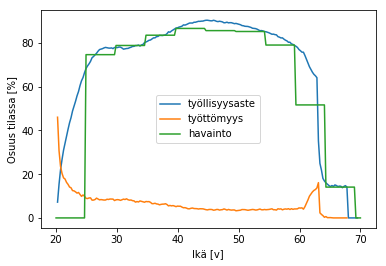

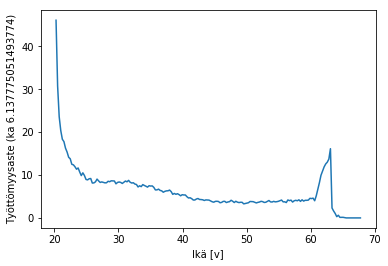

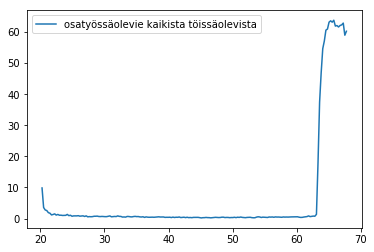

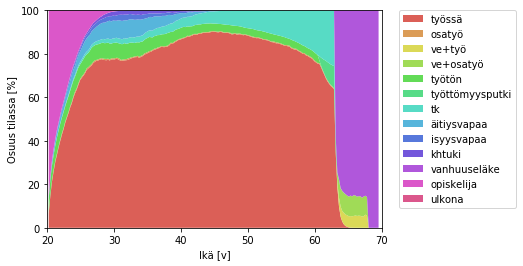

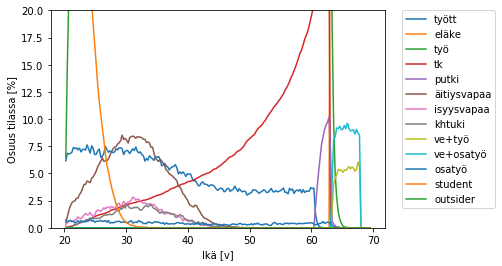

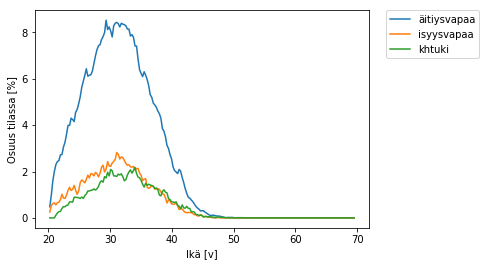

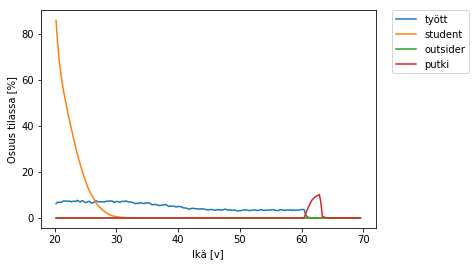

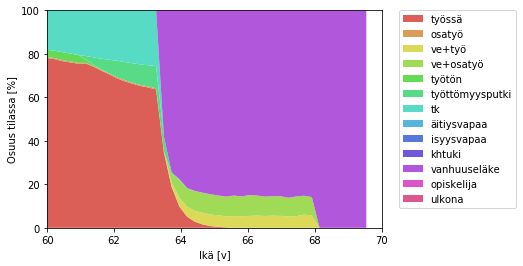

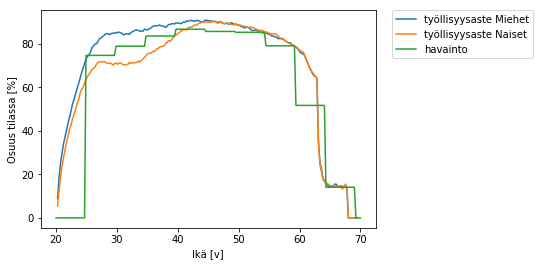

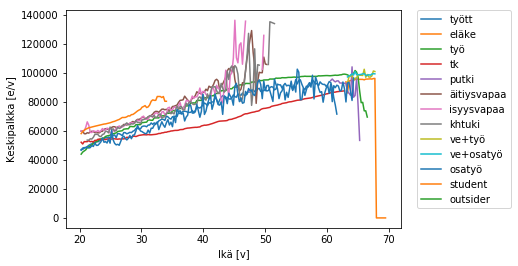

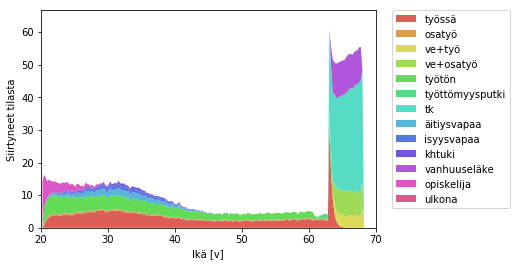

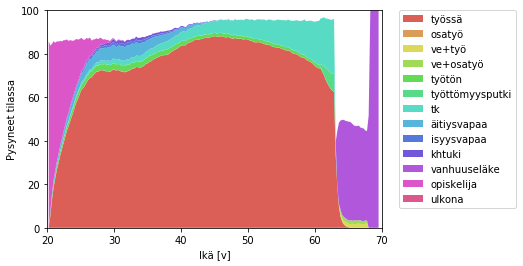

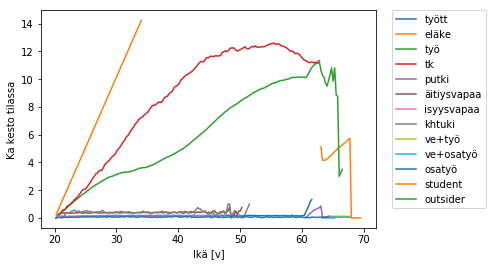

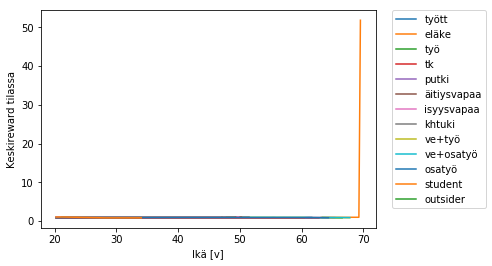

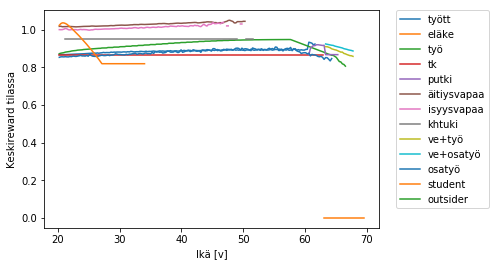

No handles with labels found to put in legend.


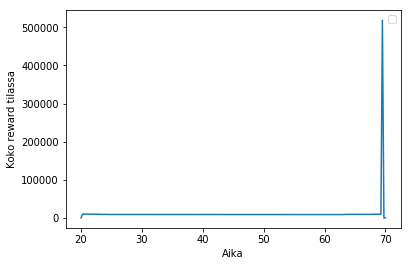

Yhteensä reward 237.39231440266622


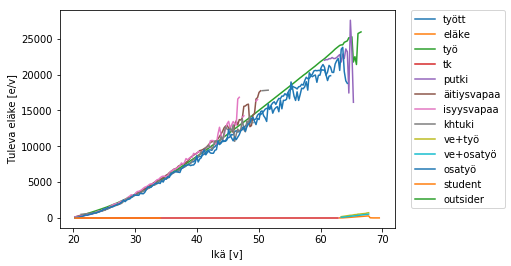

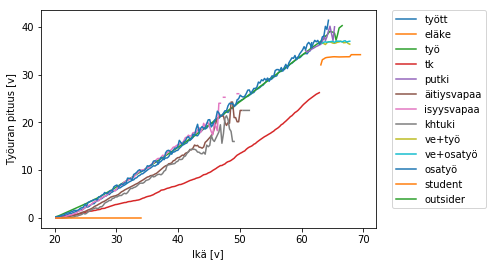

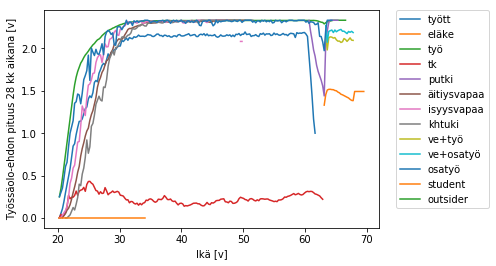

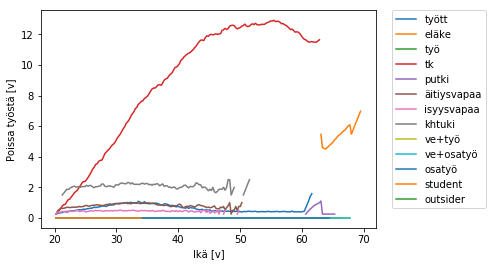

In [4]:
cc1.render(load='results/perus_results2')

# Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.938    |
| fps                | 1293     |
| nupdates           | 1        |
| policy_entropy     | 0.937    |
| policy_loss        | -0.0818  |
| total_timesteps    | 0        |
| value_loss         | 0.446    |
---------------------------------
---------------------------------
| explained_variance | 0.605    |
| fps                | 2093     |
| nupdates           | 10       |
| policy_entropy     | 0.753    |
| policy_loss        | 1        |
| total_timesteps    | 22041    |
| value_loss         | 5.31     |
---------------------------------
---------------------------------
| explained_variance | 0.78     |
| fps                | 1855     |
| nupdates           | 20       |
| policy_entropy     | 0.73     |
| policy_loss        | -2.23    |
| total_timesteps    | 46531    |
| value_loss         | 11.8     |
------------------------

---------------------------------
| explained_variance | 0.931    |
| fps                | 1681     |
| nupdates           | 270      |
| policy_entropy     | 0.911    |
| policy_loss        | 1.33     |
| total_timesteps    | 658781   |
| value_loss         | 2.93     |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 1682     |
| nupdates           | 280      |
| policy_entropy     | 0.876    |
| policy_loss        | 0.25     |
| total_timesteps    | 683271   |
| value_loss         | 0.757    |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps                | 1683     |
| nupdates           | 290      |
| policy_entropy     | 0.893    |
| policy_loss        | -1.23    |
| total_timesteps    | 707761   |
| value_loss         | 2.62     |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 1681     |
| nupdates           | 540      |
| policy_entropy     | 0.818    |
| policy_loss        | -0.102   |
| total_timesteps    | 1320011  |
| value_loss         | 0.482    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1681     |
| nupdates           | 550      |
| policy_entropy     | 0.873    |
| policy_loss        | 0.202    |
| total_timesteps    | 1344501  |
| value_loss         | 0.332    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1679     |
| nupdates           | 560      |
| policy_entropy     | 0.862    |
| policy_loss        | -0.0927  |
| total_timesteps    | 1368991  |
| value_loss         | 0.375    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.942    |
| fps                | 1675     |
| nupdates           | 810      |
| policy_entropy     | 0.814    |
| policy_loss        | -0.172   |
| total_timesteps    | 1981241  |
| value_loss         | 0.53     |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1675     |
| nupdates           | 820      |
| policy_entropy     | 0.805    |
| policy_loss        | 0.0249   |
| total_timesteps    | 2005731  |
| value_loss         | 0.369    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 1676     |
| nupdates           | 830      |
| policy_entropy     | 0.795    |
| policy_loss        | -0.0627  |
| total_timesteps    | 2030221  |
| value_loss         | 0.524    |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 1667     |
| nupdates           | 1080     |
| policy_entropy     | 0.746    |
| policy_loss        | 0.186    |
| total_timesteps    | 2642471  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 1665     |
| nupdates           | 1090     |
| policy_entropy     | 0.792    |
| policy_loss        | -0.07    |
| total_timesteps    | 2666961  |
| value_loss         | 0.373    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1664     |
| nupdates           | 1100     |
| policy_entropy     | 0.714    |
| policy_loss        | -0.034   |
| total_timesteps    | 2691451  |
| value_loss         | 0.361    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 1637     |
| nupdates           | 1350     |
| policy_entropy     | 0.808    |
| policy_loss        | -0.146   |
| total_timesteps    | 3303701  |
| value_loss         | 0.519    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1636     |
| nupdates           | 1360     |
| policy_entropy     | 0.803    |
| policy_loss        | 0.00211  |
| total_timesteps    | 3328191  |
| value_loss         | 0.364    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1636     |
| nupdates           | 1370     |
| policy_entropy     | 0.83     |
| policy_loss        | -0.0992  |
| total_timesteps    | 3352681  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 1647     |
| nupdates           | 1620     |
| policy_entropy     | 0.774    |
| policy_loss        | -0.0551  |
| total_timesteps    | 3964931  |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1647     |
| nupdates           | 1630     |
| policy_entropy     | 0.798    |
| policy_loss        | 0.0261   |
| total_timesteps    | 3989421  |
| value_loss         | 0.245    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 1648     |
| nupdates           | 1640     |
| policy_entropy     | 0.806    |
| policy_loss        | -0.0505  |
| total_timesteps    | 4013911  |
| value_loss         | 0.563    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 1656     |
| nupdates           | 1890     |
| policy_entropy     | 0.759    |
| policy_loss        | -0.0301  |
| total_timesteps    | 4626161  |
| value_loss         | 0.368    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1656     |
| nupdates           | 1900     |
| policy_entropy     | 0.761    |
| policy_loss        | 0.0314   |
| total_timesteps    | 4650651  |
| value_loss         | 0.345    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 1656     |
| nupdates           | 1910     |
| policy_entropy     | 0.757    |
| policy_loss        | 0.0906   |
| total_timesteps    | 4675141  |
| value_loss         | 0.189    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

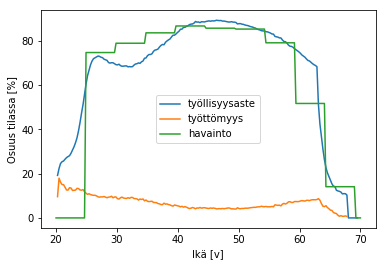

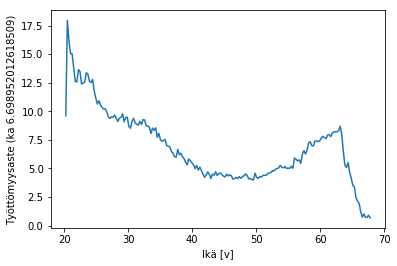

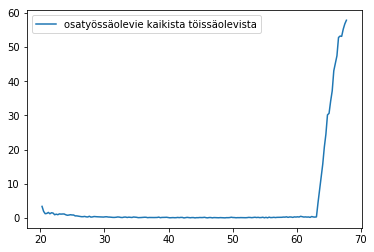

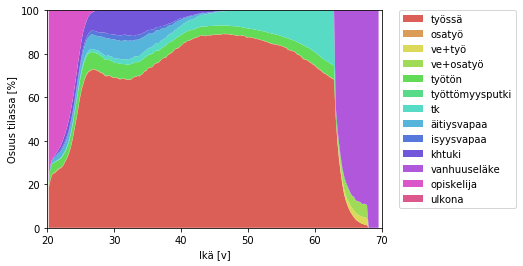

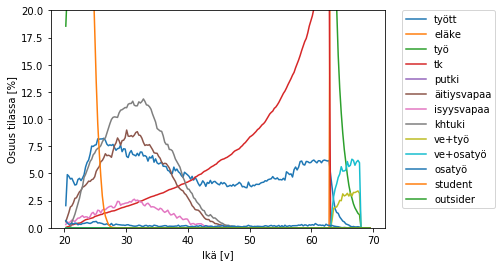

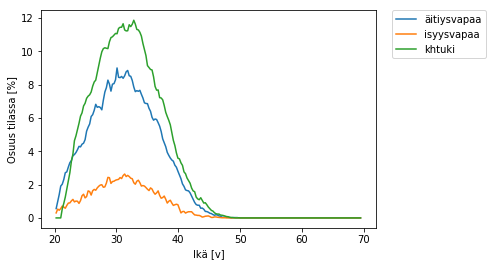

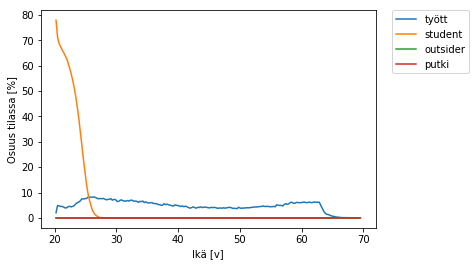

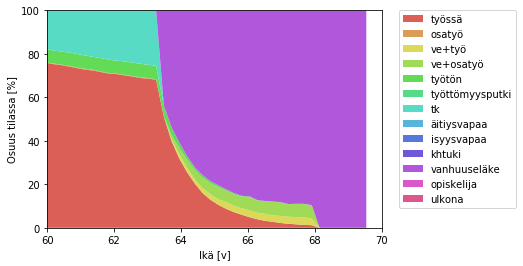

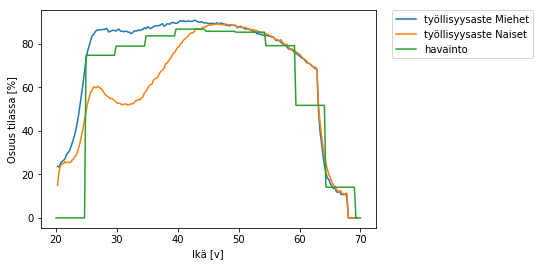

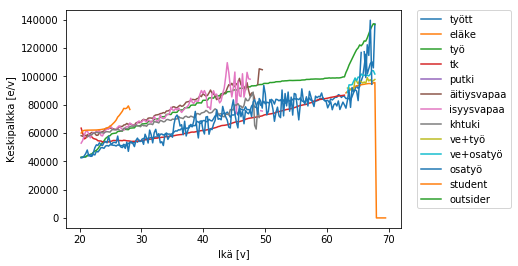

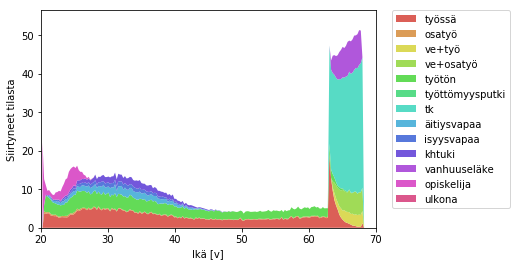

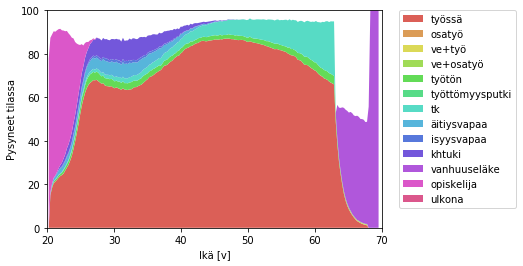

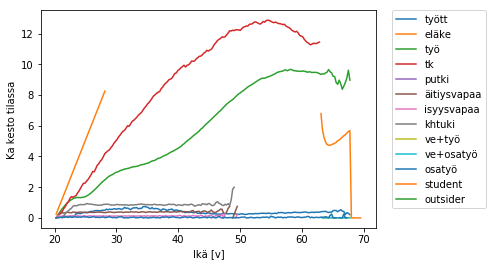

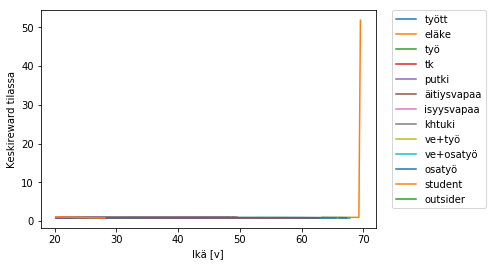

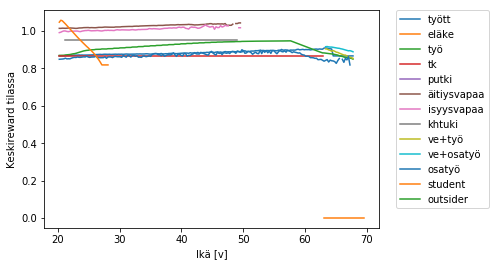

No handles with labels found to put in legend.


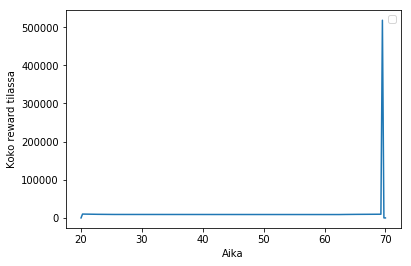

Yhteensä reward 237.7176966156532


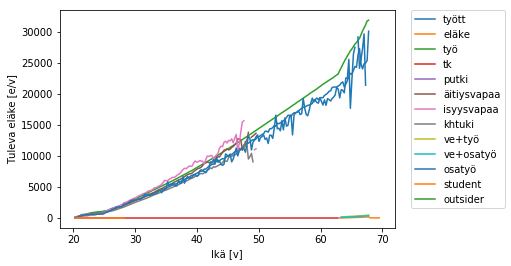

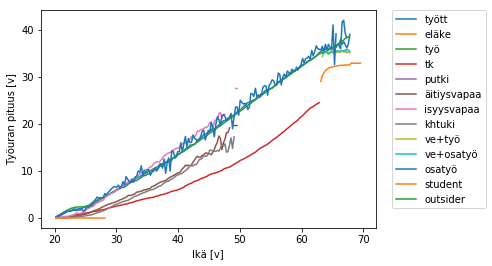

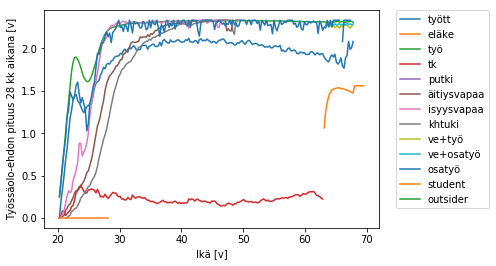

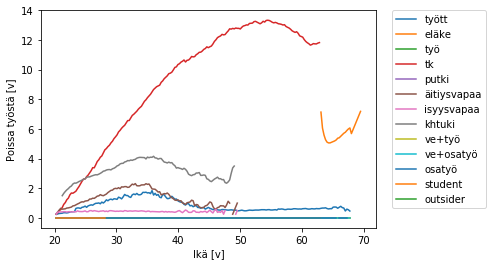

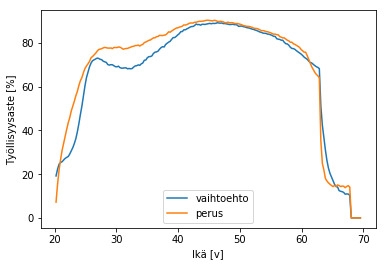

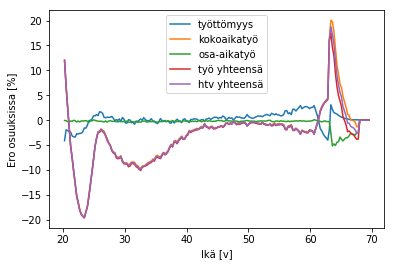

Työllisyysvaikutus 30-63-vuotiaisiin noin -70532.0 htv ja -73006.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -9.902703758513276 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.07151284342831077


In [7]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                      train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_putki',
                      plot=True,results='results/putki_results',start_from=perusmalli,cont=True,
                      callback_minsteps=callback_minsteps,twostage=twostage)
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1)                    

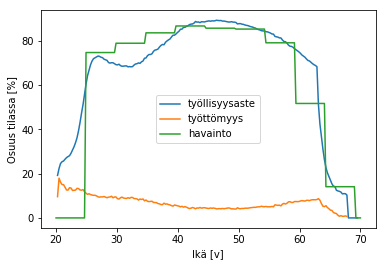

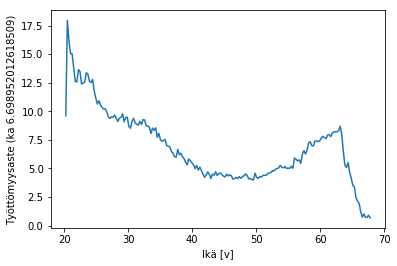

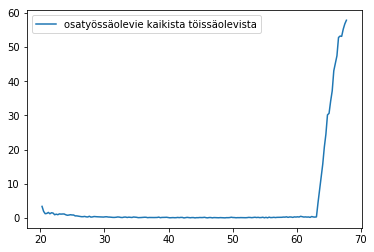

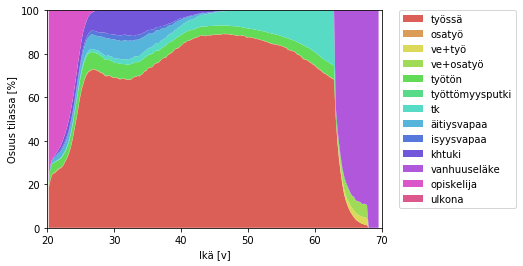

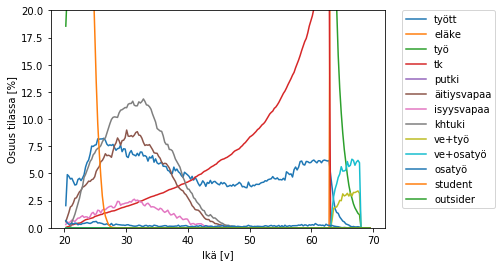

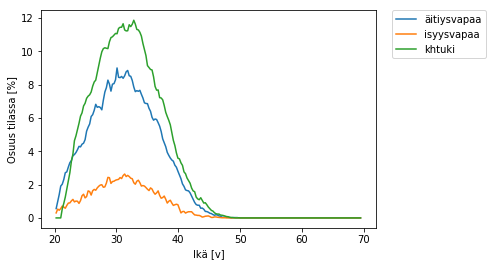

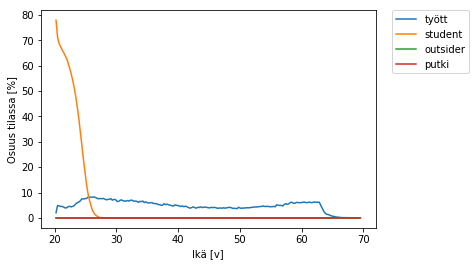

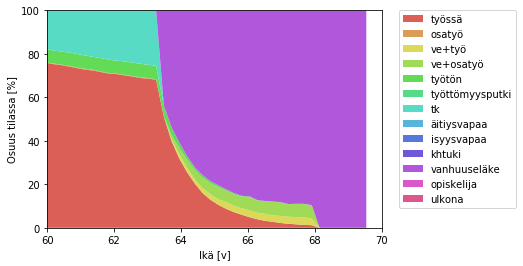

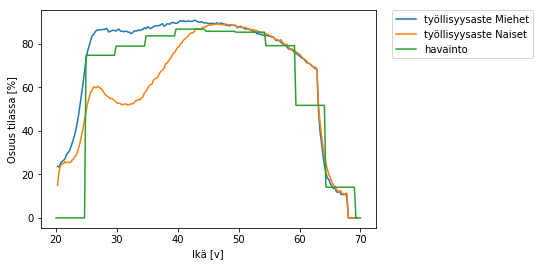

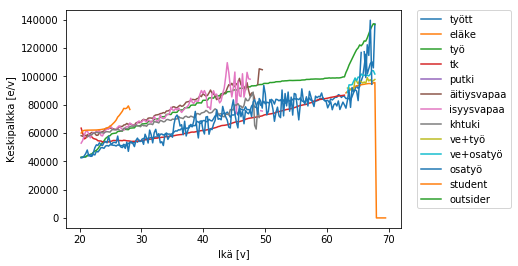

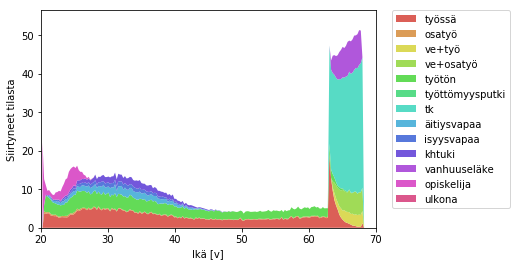

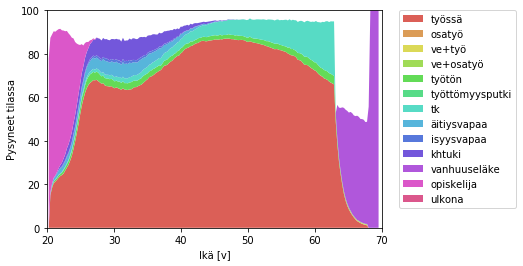

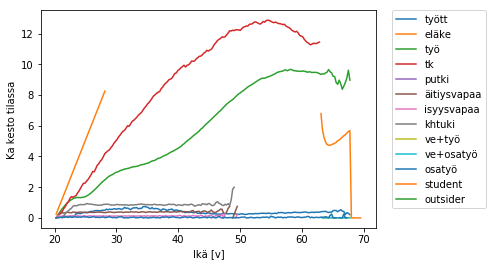

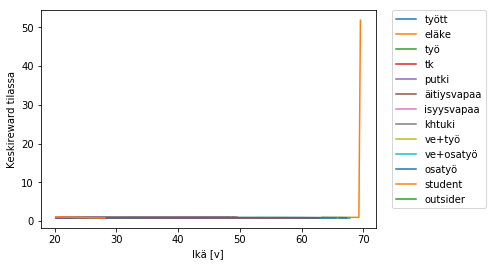

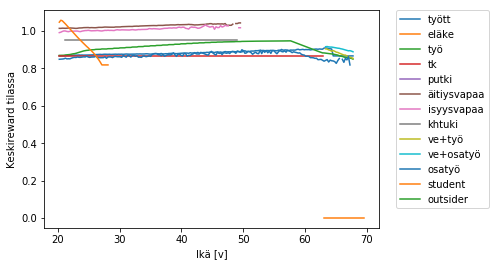

No handles with labels found to put in legend.


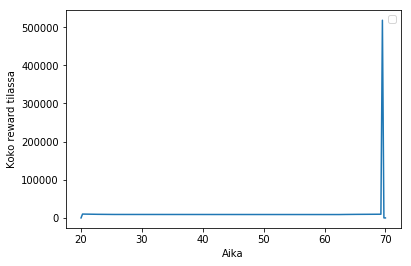

Yhteensä reward 237.7176966156532


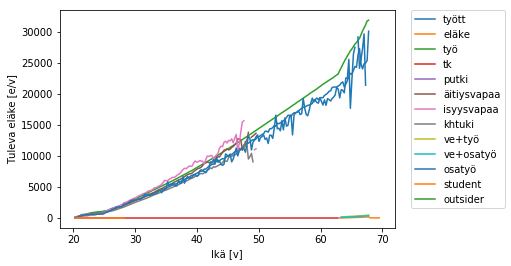

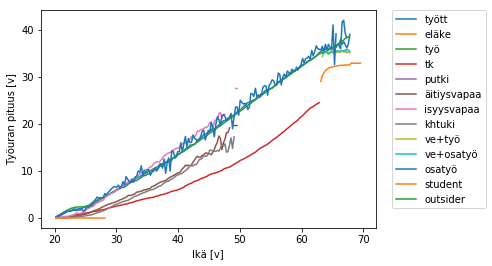

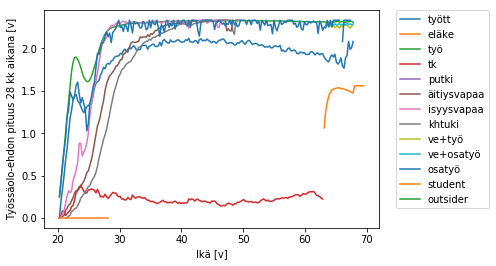

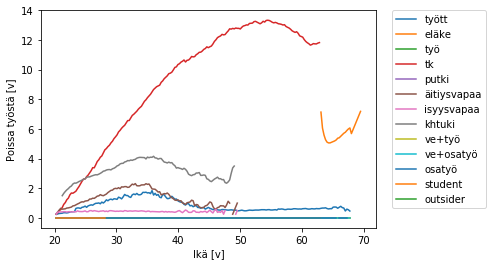

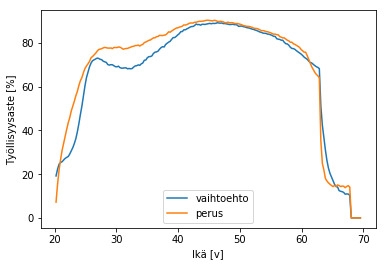

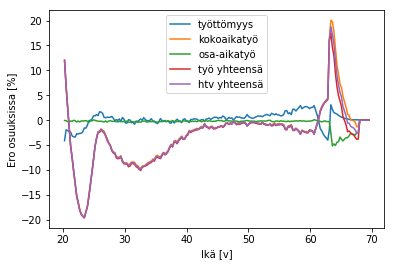

Työllisyysvaikutus 30-63-vuotiaisiin noin -70532.0 htv ja -73006.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -9.902703758513276 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.07151284342831077


In [8]:
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1) 

# Porrastettu työttömyysturva



No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.939    |
| fps                | 1474     |
| nupdates           | 1        |
| policy_entropy     | 0.871    |
| policy_loss        | -0.0972  |
| total_timesteps    | 0        |
| value_loss         | 0.681    |
---------------------------------
---------------------------------
| explained_variance | 0.853    |
| fps                | 2572     |
| nupdates           | 10       |
| policy_entropy     | 0.806    |
| policy_loss        | 1.61     |
| total_timesteps    | 22041    |
| value_loss         | 4.97     |
---------------------------------
---------------------------------
| explained_variance | 0.632    |
| fps                | 2237     |
| nupdates           | 20       |
| policy_entropy     | 0.837    |
| policy_loss        | -2.82    |
| total_timesteps    | 46531    |
| value_loss         | 15.6     |
------------------------

---------------------------------
| explained_variance | 0.95     |
| fps                | 2010     |
| nupdates           | 270      |
| policy_entropy     | 0.843    |
| policy_loss        | 0.171    |
| total_timesteps    | 658781   |
| value_loss         | 0.34     |
---------------------------------
---------------------------------
| explained_variance | 0.935    |
| fps                | 2010     |
| nupdates           | 280      |
| policy_entropy     | 0.875    |
| policy_loss        | 1.06     |
| total_timesteps    | 683271   |
| value_loss         | 2.63     |
---------------------------------
---------------------------------
| explained_variance | 0.927    |
| fps                | 2010     |
| nupdates           | 290      |
| policy_entropy     | 0.911    |
| policy_loss        | -0.823   |
| total_timesteps    | 707761   |
| value_loss         | 1.52     |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2012     |
| nupdates           | 540      |
| policy_entropy     | 0.881    |
| policy_loss        | 0.779    |
| total_timesteps    | 1320011  |
| value_loss         | 1.11     |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 2012     |
| nupdates           | 550      |
| policy_entropy     | 0.89     |
| policy_loss        | 0.246    |
| total_timesteps    | 1344501  |
| value_loss         | 0.62     |
---------------------------------
---------------------------------
| explained_variance | 0.866    |
| fps                | 2012     |
| nupdates           | 560      |
| policy_entropy     | 0.931    |
| policy_loss        | -0.82    |
| total_timesteps    | 1368991  |
| value_loss         | 1.8      |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.915    |
| fps                | 2005     |
| nupdates           | 810      |
| policy_entropy     | 0.802    |
| policy_loss        | 0.0314   |
| total_timesteps    | 1981241  |
| value_loss         | 0.533    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 2005     |
| nupdates           | 820      |
| policy_entropy     | 0.881    |
| policy_loss        | -0.0844  |
| total_timesteps    | 2005731  |
| value_loss         | 0.656    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2005     |
| nupdates           | 830      |
| policy_entropy     | 0.918    |
| policy_loss        | 0.0244   |
| total_timesteps    | 2030221  |
| value_loss         | 0.472    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1912     |
| nupdates           | 1080     |
| policy_entropy     | 0.822    |
| policy_loss        | 0.0124   |
| total_timesteps    | 2642471  |
| value_loss         | 0.329    |
---------------------------------
---------------------------------
| explained_variance | 0.922    |
| fps                | 1909     |
| nupdates           | 1090     |
| policy_entropy     | 0.851    |
| policy_loss        | -0.2     |
| total_timesteps    | 2666961  |
| value_loss         | 0.565    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 1906     |
| nupdates           | 1100     |
| policy_entropy     | 0.823    |
| policy_loss        | -0.129   |
| total_timesteps    | 2691451  |
| value_loss         | 0.459    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.957    |
| fps                | 1855     |
| nupdates           | 1350     |
| policy_entropy     | 0.809    |
| policy_loss        | 0.115    |
| total_timesteps    | 3303701  |
| value_loss         | 0.531    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 1853     |
| nupdates           | 1360     |
| policy_entropy     | 0.772    |
| policy_loss        | 0.272    |
| total_timesteps    | 3328191  |
| value_loss         | 1.08     |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 1852     |
| nupdates           | 1370     |
| policy_entropy     | 0.792    |
| policy_loss        | -0.418   |
| total_timesteps    | 3352681  |
| value_loss         | 0.629    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.941    |
| fps                | 1822     |
| nupdates           | 1620     |
| policy_entropy     | 0.814    |
| policy_loss        | 0.557    |
| total_timesteps    | 3964931  |
| value_loss         | 1.39     |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 1822     |
| nupdates           | 1630     |
| policy_entropy     | 0.768    |
| policy_loss        | -0.731   |
| total_timesteps    | 3989421  |
| value_loss         | 1.48     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1821     |
| nupdates           | 1640     |
| policy_entropy     | 0.789    |
| policy_loss        | 0.0187   |
| total_timesteps    | 4013911  |
| value_loss         | 0.543    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 1802     |
| nupdates           | 1890     |
| policy_entropy     | 0.803    |
| policy_loss        | 0.256    |
| total_timesteps    | 4626161  |
| value_loss         | 0.49     |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1801     |
| nupdates           | 1900     |
| policy_entropy     | 0.829    |
| policy_loss        | -0.275   |
| total_timesteps    | 4650651  |
| value_loss         | 0.57     |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 1801     |
| nupdates           | 1910     |
| policy_entropy     | 0.835    |
| policy_loss        | 0.238    |
| total_timesteps    | 4675141  |
| value_loss         | 0.63     |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 1786     |
| nupdates           | 2160     |
| policy_entropy     | 0.769    |
| policy_loss        | -0.0698  |
| total_timesteps    | 5287391  |
| value_loss         | 0.446    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1786     |
| nupdates           | 2170     |
| policy_entropy     | 0.712    |
| policy_loss        | 0.119    |
| total_timesteps    | 5311881  |
| value_loss         | 0.246    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1785     |
| nupdates           | 2180     |
| policy_entropy     | 0.761    |
| policy_loss        | 0.0472   |
| total_timesteps    | 5336371  |
| value_loss         | 0.282    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.96     |
| fps                | 1774     |
| nupdates           | 2430     |
| policy_entropy     | 0.75     |
| policy_loss        | -0.0689  |
| total_timesteps    | 5948621  |
| value_loss         | 0.464    |
---------------------------------
---------------------------------
| explained_variance | 0.908    |
| fps                | 1774     |
| nupdates           | 2440     |
| policy_entropy     | 0.728    |
| policy_loss        | -0.0409  |
| total_timesteps    | 5973111  |
| value_loss         | 0.704    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1774     |
| nupdates           | 2450     |
| policy_entropy     | 0.762    |
| policy_loss        | 0.011    |
| total_timesteps    | 5997601  |
| value_loss         | 0.373    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.96     |
| fps                | 1766     |
| nupdates           | 2700     |
| policy_entropy     | 0.842    |
| policy_loss        | -0.159   |
| total_timesteps    | 6609851  |
| value_loss         | 0.533    |
---------------------------------
---------------------------------
| explained_variance | 0.93     |
| fps                | 1766     |
| nupdates           | 2710     |
| policy_entropy     | 0.812    |
| policy_loss        | -0.23    |
| total_timesteps    | 6634341  |
| value_loss         | 0.739    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1766     |
| nupdates           | 2720     |
| policy_entropy     | 0.72     |
| policy_loss        | -0.175   |
| total_timesteps    | 6658831  |
| value_loss         | 0.549    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 1760     |
| nupdates           | 2970     |
| policy_entropy     | 0.821    |
| policy_loss        | -0.195   |
| total_timesteps    | 7271081  |
| value_loss         | 0.395    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 1761     |
| nupdates           | 2980     |
| policy_entropy     | 0.773    |
| policy_loss        | -0.0797  |
| total_timesteps    | 7295571  |
| value_loss         | 0.249    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1761     |
| nupdates           | 2990     |
| policy_entropy     | 0.812    |
| policy_loss        | -0.0461  |
| total_timesteps    | 7320061  |
| value_loss         | 0.637    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.955    |
| fps                | 1744     |
| nupdates           | 3240     |
| policy_entropy     | 0.834    |
| policy_loss        | -0.103   |
| total_timesteps    | 7932311  |
| value_loss         | 0.515    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1743     |
| nupdates           | 3250     |
| policy_entropy     | 0.778    |
| policy_loss        | 0.0678   |
| total_timesteps    | 7956801  |
| value_loss         | 0.299    |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps                | 1743     |
| nupdates           | 3260     |
| policy_entropy     | 0.774    |
| policy_loss        | 0.067    |
| total_timesteps    | 7981291  |
| value_loss         | 0.482    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.953    |
| fps                | 1731     |
| nupdates           | 3510     |
| policy_entropy     | 0.765    |
| policy_loss        | -0.0305  |
| total_timesteps    | 8593541  |
| value_loss         | 0.468    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 1731     |
| nupdates           | 3520     |
| policy_entropy     | 0.833    |
| policy_loss        | -0.0964  |
| total_timesteps    | 8618031  |
| value_loss         | 0.498    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1731     |
| nupdates           | 3530     |
| policy_entropy     | 0.814    |
| policy_loss        | 0.0293   |
| total_timesteps    | 8642521  |
| value_loss         | 0.26     |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 1729     |
| nupdates           | 3780     |
| policy_entropy     | 0.85     |
| policy_loss        | -0.0545  |
| total_timesteps    | 9254771  |
| value_loss         | 0.4      |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1729     |
| nupdates           | 3790     |
| policy_entropy     | 0.806    |
| policy_loss        | 0.0711   |
| total_timesteps    | 9279261  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 1729     |
| nupdates           | 3800     |
| policy_entropy     | 0.755    |
| policy_loss        | -0.0704  |
| total_timesteps    | 9303751  |
| value_loss         | 0.52     |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.943    |
| fps                | 1725     |
| nupdates           | 4050     |
| policy_entropy     | 0.861    |
| policy_loss        | -0.13    |
| total_timesteps    | 9916001  |
| value_loss         | 0.656    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1725     |
| nupdates           | 4060     |
| policy_entropy     | 0.797    |
| policy_loss        | -0.0453  |
| total_timesteps    | 9940491  |
| value_loss         | 0.259    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1725     |
| nupdates           | 4070     |
| policy_entropy     | 0.802    |
| policy_loss        | 0.0177   |
| total_timesteps    | 9964981  |
| value_loss         | 0.324    |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps         

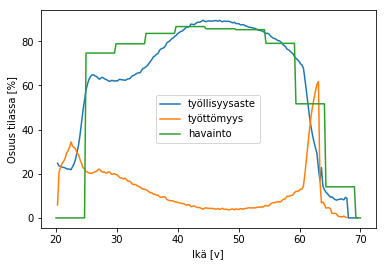

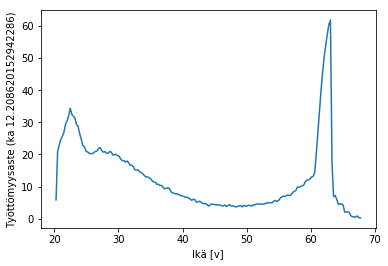

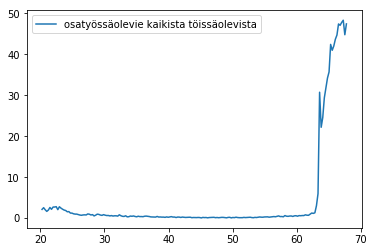

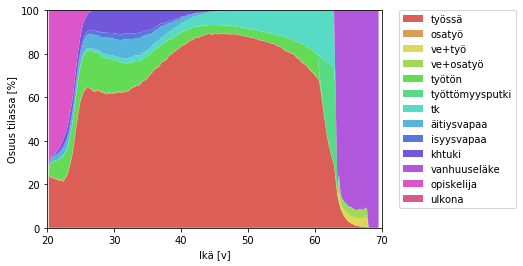

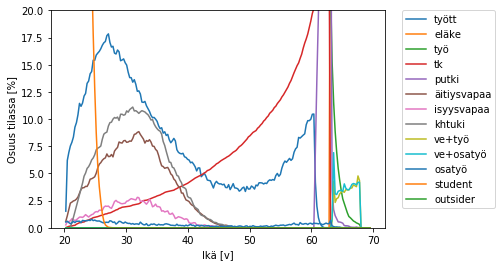

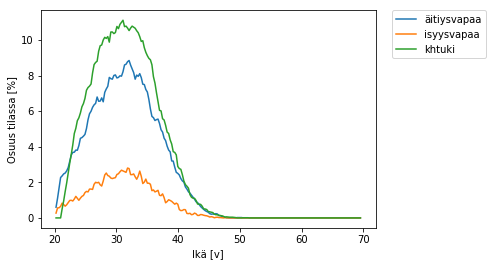

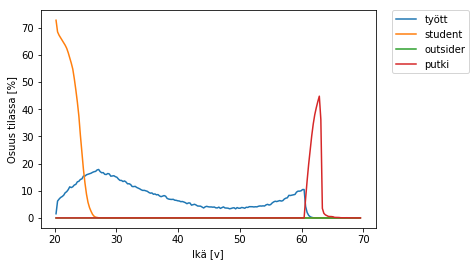

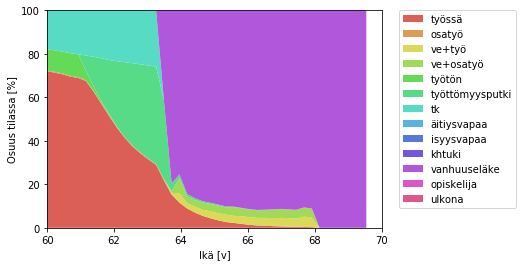

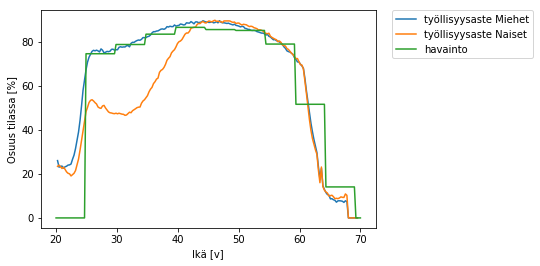

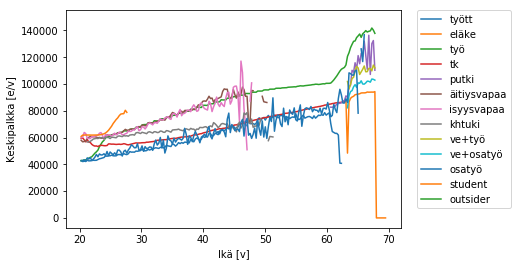

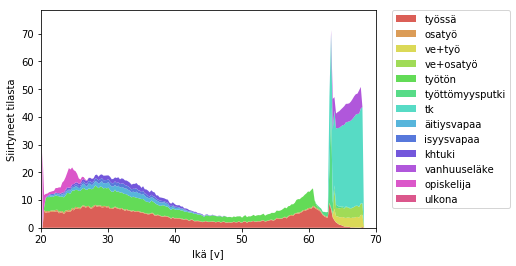

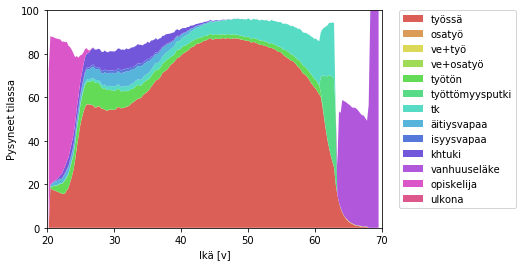

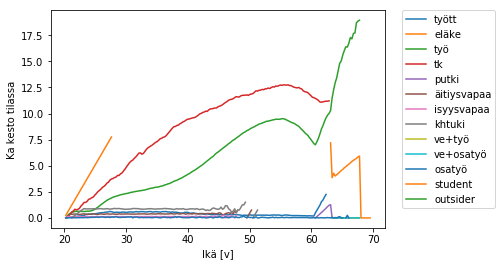

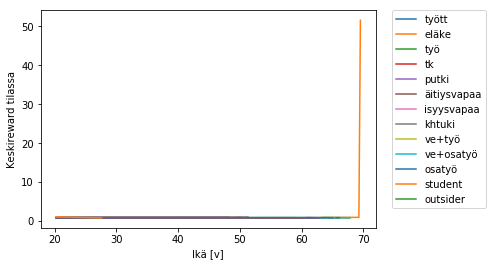

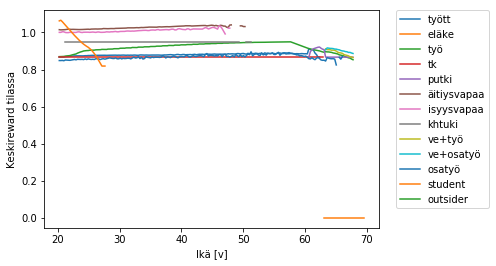

No handles with labels found to put in legend.


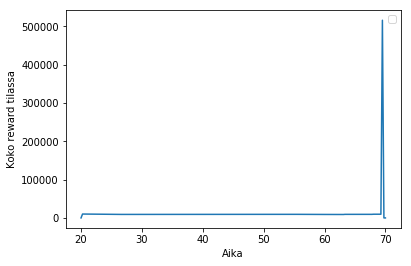

Yhteensä reward 237.69272185421474


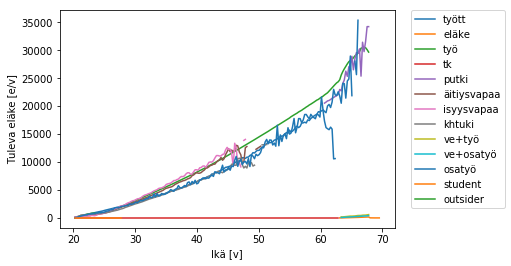

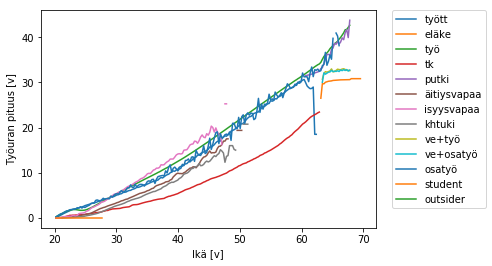

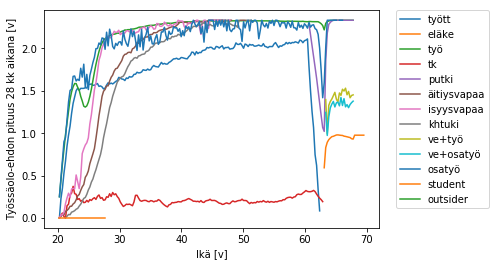

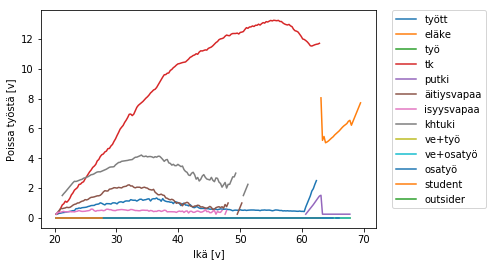

In [5]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_steps',plot=True,
                results='results/steps_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc2_porras.render(load='results/steps_results')


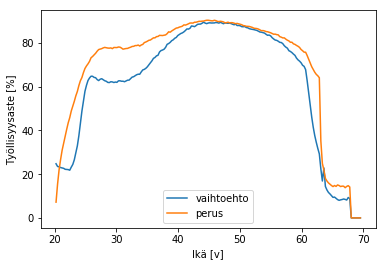

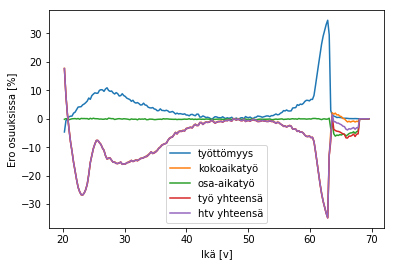

Työllisyysvaikutus 30-63-vuotiaisiin noin -129544.0 htv ja -131160.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -17.79084766959702 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.10914770686846306


In [6]:
cc2_porras.compare_with(cc1)

# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [9]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_ek',plot=True,
                results='results/ek_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
#cc2.render(load='results/ek_results')
#cc2.load_sim(load='results/ek_results')

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.981    |
| fps                | 1256     |
| nupdates           | 1        |
| policy_entropy     | 0.829    |
| policy_loss        | 0.00417  |
| total_timesteps    | 0        |
| value_loss         | 0.202    |
---------------------------------
---------------------------------
| explained_variance | -0.202   |
| fps                | 2098     |
| nupdates           | 10       |
| policy_entropy     | 0.81     |
| policy_loss        | 4.01     |
| total_timesteps    | 22041    |
| value_loss         | 33.1     |
---------------------------------
---------------------------------
| explained_variance | 0.508    |
| fps                | 1850     |
| nupdates           | 20       |
| policy_entropy     | 0.736    |
| policy_loss        | -3.7     |
| total_timesteps    | 46531    |
| value_loss         | 28.1     |
------------------------

---------------------------------
| explained_variance | 0.964    |
| fps                | 1676     |
| nupdates           | 270      |
| policy_entropy     | 0.817    |
| policy_loss        | 1.38     |
| total_timesteps    | 658781   |
| value_loss         | 3.39     |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1676     |
| nupdates           | 280      |
| policy_entropy     | 0.823    |
| policy_loss        | 0.286    |
| total_timesteps    | 683271   |
| value_loss         | 0.656    |
---------------------------------
---------------------------------
| explained_variance | 0.939    |
| fps                | 1676     |
| nupdates           | 290      |
| policy_entropy     | 0.893    |
| policy_loss        | -1.14    |
| total_timesteps    | 707761   |
| value_loss         | 2.36     |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps         

---------------------------------
| explained_variance | 0.949    |
| fps                | 1670     |
| nupdates           | 540      |
| policy_entropy     | 0.774    |
| policy_loss        | 0.901    |
| total_timesteps    | 1320011  |
| value_loss         | 2.15     |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1671     |
| nupdates           | 550      |
| policy_entropy     | 0.803    |
| policy_loss        | -0.132   |
| total_timesteps    | 1344501  |
| value_loss         | 0.495    |
---------------------------------
---------------------------------
| explained_variance | 0.922    |
| fps                | 1671     |
| nupdates           | 560      |
| policy_entropy     | 0.836    |
| policy_loss        | -0.551   |
| total_timesteps    | 1368991  |
| value_loss         | 1.18     |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 1669     |
| nupdates           | 810      |
| policy_entropy     | 0.776    |
| policy_loss        | 0.0576   |
| total_timesteps    | 1981241  |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 1669     |
| nupdates           | 820      |
| policy_entropy     | 0.829    |
| policy_loss        | 0.0398   |
| total_timesteps    | 2005731  |
| value_loss         | 0.647    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1670     |
| nupdates           | 830      |
| policy_entropy     | 0.824    |
| policy_loss        | -0.0597  |
| total_timesteps    | 2030221  |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 1661     |
| nupdates           | 1080     |
| policy_entropy     | 0.765    |
| policy_loss        | 0.0544   |
| total_timesteps    | 2642471  |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.924    |
| fps                | 1660     |
| nupdates           | 1090     |
| policy_entropy     | 0.817    |
| policy_loss        | -0.11    |
| total_timesteps    | 2666961  |
| value_loss         | 0.59     |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 1659     |
| nupdates           | 1100     |
| policy_entropy     | 0.792    |
| policy_loss        | -0.0189  |
| total_timesteps    | 2691451  |
| value_loss         | 0.232    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps         

----------------------------------
| explained_variance | 0.968     |
| fps                | 1634      |
| nupdates           | 1350      |
| policy_entropy     | 0.761     |
| policy_loss        | -0.000412 |
| total_timesteps    | 3303701   |
| value_loss         | 0.371     |
----------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1632     |
| nupdates           | 1360     |
| policy_entropy     | 0.742    |
| policy_loss        | -0.146   |
| total_timesteps    | 3328191  |
| value_loss         | 0.389    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1632     |
| nupdates           | 1370     |
| policy_entropy     | 0.78     |
| policy_loss        | 0.205    |
| total_timesteps    | 3352681  |
| value_loss         | 0.408    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps

---------------------------------
| explained_variance | 0.944    |
| fps                | 1643     |
| nupdates           | 1620     |
| policy_entropy     | 0.778    |
| policy_loss        | 0.172    |
| total_timesteps    | 3964931  |
| value_loss         | 0.685    |
---------------------------------
---------------------------------
| explained_variance | 0.911    |
| fps                | 1643     |
| nupdates           | 1630     |
| policy_entropy     | 0.769    |
| policy_loss        | -0.76    |
| total_timesteps    | 3989421  |
| value_loss         | 1.48     |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 1643     |
| nupdates           | 1640     |
| policy_entropy     | 0.804    |
| policy_loss        | 0.206    |
| total_timesteps    | 4013911  |
| value_loss         | 0.521    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 1651     |
| nupdates           | 1890     |
| policy_entropy     | 0.752    |
| policy_loss        | 0.18     |
| total_timesteps    | 4626161  |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.93     |
| fps                | 1651     |
| nupdates           | 1900     |
| policy_entropy     | 0.782    |
| policy_loss        | -0.188   |
| total_timesteps    | 4650651  |
| value_loss         | 0.731    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 1651     |
| nupdates           | 1910     |
| policy_entropy     | 0.767    |
| policy_loss        | -0.00921 |
| total_timesteps    | 4675141  |
| value_loss         | 0.238    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 1656     |
| nupdates           | 2160     |
| policy_entropy     | 0.736    |
| policy_loss        | -0.022   |
| total_timesteps    | 5287391  |
| value_loss         | 0.337    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1656     |
| nupdates           | 2170     |
| policy_entropy     | 0.797    |
| policy_loss        | -0.118   |
| total_timesteps    | 5311881  |
| value_loss         | 0.507    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1656     |
| nupdates           | 2180     |
| policy_entropy     | 0.807    |
| policy_loss        | 0.0233   |
| total_timesteps    | 5336371  |
| value_loss         | 0.485    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 1661     |
| nupdates           | 2430     |
| policy_entropy     | 0.753    |
| policy_loss        | 0.0478   |
| total_timesteps    | 5948621  |
| value_loss         | 0.222    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1661     |
| nupdates           | 2440     |
| policy_entropy     | 0.766    |
| policy_loss        | -0.0145  |
| total_timesteps    | 5973111  |
| value_loss         | 0.427    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 1661     |
| nupdates           | 2450     |
| policy_entropy     | 0.791    |
| policy_loss        | -0.107   |
| total_timesteps    | 5997601  |
| value_loss         | 0.656    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps         

---------------------------------
| explained_variance | 0.991    |
| fps                | 1665     |
| nupdates           | 2700     |
| policy_entropy     | 0.835    |
| policy_loss        | 0.033    |
| total_timesteps    | 6609851  |
| value_loss         | 0.218    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1665     |
| nupdates           | 2710     |
| policy_entropy     | 0.778    |
| policy_loss        | 0.055    |
| total_timesteps    | 6634341  |
| value_loss         | 0.483    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1665     |
| nupdates           | 2720     |
| policy_entropy     | 0.783    |
| policy_loss        | 0.0331   |
| total_timesteps    | 6658831  |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 1668     |
| nupdates           | 2970     |
| policy_entropy     | 0.791    |
| policy_loss        | -0.0262  |
| total_timesteps    | 7271081  |
| value_loss         | 0.465    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 1668     |
| nupdates           | 2980     |
| policy_entropy     | 0.737    |
| policy_loss        | -0.0541  |
| total_timesteps    | 7295571  |
| value_loss         | 0.661    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1668     |
| nupdates           | 2990     |
| policy_entropy     | 0.735    |
| policy_loss        | -0.0333  |
| total_timesteps    | 7320061  |
| value_loss         | 0.434    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 1670     |
| nupdates           | 3240     |
| policy_entropy     | 0.782    |
| policy_loss        | 0.276    |
| total_timesteps    | 7932311  |
| value_loss         | 0.501    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1670     |
| nupdates           | 3250     |
| policy_entropy     | 0.79     |
| policy_loss        | -0.194   |
| total_timesteps    | 7956801  |
| value_loss         | 0.33     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1670     |
| nupdates           | 3260     |
| policy_entropy     | 0.673    |
| policy_loss        | 0.271    |
| total_timesteps    | 7981291  |
| value_loss         | 0.428    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 1671     |
| nupdates           | 3510     |
| policy_entropy     | 0.735    |
| policy_loss        | 0.0169   |
| total_timesteps    | 8593541  |
| value_loss         | 0.265    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1672     |
| nupdates           | 3520     |
| policy_entropy     | 0.739    |
| policy_loss        | 0.0659   |
| total_timesteps    | 8618031  |
| value_loss         | 0.294    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 1672     |
| nupdates           | 3530     |
| policy_entropy     | 0.743    |
| policy_loss        | 0.0212   |
| total_timesteps    | 8642521  |
| value_loss         | 0.432    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 1664     |
| nupdates           | 3780     |
| policy_entropy     | 0.736    |
| policy_loss        | -0.0653  |
| total_timesteps    | 9254771  |
| value_loss         | 0.66     |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 1663     |
| nupdates           | 3790     |
| policy_entropy     | 0.757    |
| policy_loss        | 0.0177   |
| total_timesteps    | 9279261  |
| value_loss         | 0.468    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1663     |
| nupdates           | 3800     |
| policy_entropy     | 0.742    |
| policy_loss        | -0.0127  |
| total_timesteps    | 9303751  |
| value_loss         | 0.445    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 1656     |
| nupdates           | 4050     |
| policy_entropy     | 0.746    |
| policy_loss        | -0.00966 |
| total_timesteps    | 9916001  |
| value_loss         | 0.515    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 1656     |
| nupdates           | 4060     |
| policy_entropy     | 0.805    |
| policy_loss        | -0.0531  |
| total_timesteps    | 9940491  |
| value_loss         | 0.348    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 1656     |
| nupdates           | 4070     |
| policy_entropy     | 0.77     |
| policy_loss        | 0.0773   |
| total_timesteps    | 9964981  |
| value_loss         | 0.347    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

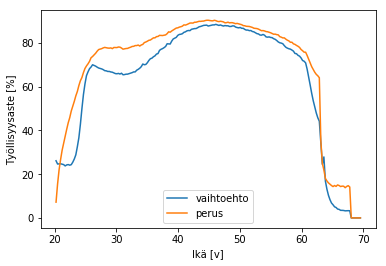

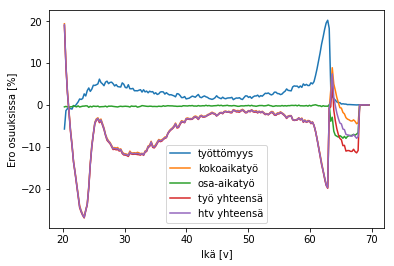

Työllisyysvaikutus 30-63-vuotiaisiin noin -112291.0 htv ja -114904.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -15.58584599441426 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.08586810116104193


In [10]:
cc2.compare_with(cc1)
#print(cc1.episodestats.empstate/cc1.n_pop,cc2.episodestats.empstate/cc2.n_pop)
#cc2.episodestats.load_sim('results/ek_res__best')
#cc2.episodestats.render()

# Verifiointi

Ajetaan sama simulaatio kaksi kertaa ja tarkastetaan että tulokset ovat sama. Tässä ideana on varmistaa, että satunnaisuus ei sotke tulosten arviointia.

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.938    |
| fps                | 1240     |
| nupdates           | 1        |
| policy_entropy     | 0.815    |
| policy_loss        | 0.0124   |
| total_timesteps    | 0        |
| value_loss         | 0.581    |
---------------------------------
---------------------------------
| explained_variance | 0.836    |
| fps                | 2117     |
| nupdates           | 10       |
| policy_entropy     | 0.21     |
| policy_loss        | -0.793   |
| total_timesteps    | 22041    |
| value_loss         | 12.5     |
---------------------------------
---------------------------------
| explained_variance | 0.766    |
| fps                | 1861     |
| nupdates           | 20       |
| policy_entropy     | 0.151    |
| policy_loss        | 0.264    |
| total_timesteps    | 46531    |
| value_loss         | 8.12     |
------------------------

---------------------------------
| explained_variance | 0.964    |
| fps                | 1681     |
| nupdates           | 270      |
| policy_entropy     | 0.297    |
| policy_loss        | -0.0962  |
| total_timesteps    | 658781   |
| value_loss         | 0.406    |
---------------------------------
---------------------------------
| explained_variance | 0.924    |
| fps                | 1682     |
| nupdates           | 280      |
| policy_entropy     | 0.383    |
| policy_loss        | -0.253   |
| total_timesteps    | 683271   |
| value_loss         | 1.72     |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 1683     |
| nupdates           | 290      |
| policy_entropy     | 0.336    |
| policy_loss        | 0.212    |
| total_timesteps    | 707761   |
| value_loss         | 1.07     |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.941    |
| fps                | 1682     |
| nupdates           | 540      |
| policy_entropy     | 0.45     |
| policy_loss        | -0.447   |
| total_timesteps    | 1320011  |
| value_loss         | 1.97     |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1682     |
| nupdates           | 550      |
| policy_entropy     | 0.492    |
| policy_loss        | 0.371    |
| total_timesteps    | 1344501  |
| value_loss         | 0.973    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 1683     |
| nupdates           | 560      |
| policy_entropy     | 0.531    |
| policy_loss        | 0.135    |
| total_timesteps    | 1368991  |
| value_loss         | 0.782    |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps         

---------------------------------
| explained_variance | 0.832    |
| fps                | 1683     |
| nupdates           | 810      |
| policy_entropy     | 0.861    |
| policy_loss        | -0.0868  |
| total_timesteps    | 1981241  |
| value_loss         | 0.668    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 1682     |
| nupdates           | 820      |
| policy_entropy     | 0.81     |
| policy_loss        | -0.128   |
| total_timesteps    | 2005731  |
| value_loss         | 0.622    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 1682     |
| nupdates           | 830      |
| policy_entropy     | 0.791    |
| policy_loss        | 0.0654   |
| total_timesteps    | 2030221  |
| value_loss         | 0.498    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 1683     |
| nupdates           | 1080     |
| policy_entropy     | 0.769    |
| policy_loss        | 0.127    |
| total_timesteps    | 2642471  |
| value_loss         | 0.412    |
---------------------------------
---------------------------------
| explained_variance | 0.915    |
| fps                | 1684     |
| nupdates           | 1090     |
| policy_entropy     | 0.827    |
| policy_loss        | -0.0942  |
| total_timesteps    | 2666961  |
| value_loss         | 0.673    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1684     |
| nupdates           | 1100     |
| policy_entropy     | 0.803    |
| policy_loss        | -0.0332  |
| total_timesteps    | 2691451  |
| value_loss         | 0.339    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.95     |
| fps                | 1686     |
| nupdates           | 1350     |
| policy_entropy     | 0.78     |
| policy_loss        | -0.0582  |
| total_timesteps    | 3303701  |
| value_loss         | 0.531    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 1687     |
| nupdates           | 1360     |
| policy_entropy     | 0.881    |
| policy_loss        | 0.125    |
| total_timesteps    | 3328191  |
| value_loss         | 0.216    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 1687     |
| nupdates           | 1370     |
| policy_entropy     | 0.822    |
| policy_loss        | -0.14    |
| total_timesteps    | 3352681  |
| value_loss         | 0.689    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 1683     |
| nupdates           | 1620     |
| policy_entropy     | 0.856    |
| policy_loss        | -0.157   |
| total_timesteps    | 3964931  |
| value_loss         | 0.463    |
---------------------------------
---------------------------------
| explained_variance | 0.926    |
| fps                | 1682     |
| nupdates           | 1630     |
| policy_entropy     | 0.754    |
| policy_loss        | -0.0598  |
| total_timesteps    | 3989421  |
| value_loss         | 0.594    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 1681     |
| nupdates           | 1640     |
| policy_entropy     | 0.795    |
| policy_loss        | -0.0705  |
| total_timesteps    | 4013911  |
| value_loss         | 0.441    |
---------------------------------
---------------------------------
| explained_variance | 0.886    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 1663     |
| nupdates           | 1890     |
| policy_entropy     | 0.732    |
| policy_loss        | 0.00033  |
| total_timesteps    | 4626161  |
| value_loss         | 0.521    |
---------------------------------
---------------------------------
| explained_variance | 0.911    |
| fps                | 1663     |
| nupdates           | 1900     |
| policy_entropy     | 0.797    |
| policy_loss        | -0.208   |
| total_timesteps    | 4650651  |
| value_loss         | 0.75     |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1663     |
| nupdates           | 1910     |
| policy_entropy     | 0.876    |
| policy_loss        | 0.0183   |
| total_timesteps    | 4675141  |
| value_loss         | 0.441    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 1669     |
| nupdates           | 2160     |
| policy_entropy     | 0.745    |
| policy_loss        | -0.0586  |
| total_timesteps    | 5287391  |
| value_loss         | 0.513    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1670     |
| nupdates           | 2170     |
| policy_entropy     | 0.833    |
| policy_loss        | 0.0198   |
| total_timesteps    | 5311881  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1670     |
| nupdates           | 2180     |
| policy_entropy     | 0.776    |
| policy_loss        | -0.0538  |
| total_timesteps    | 5336371  |
| value_loss         | 0.453    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.943    |
| fps                | 1675     |
| nupdates           | 2430     |
| policy_entropy     | 0.781    |
| policy_loss        | -0.164   |
| total_timesteps    | 5948621  |
| value_loss         | 0.862    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1675     |
| nupdates           | 2440     |
| policy_entropy     | 0.837    |
| policy_loss        | -0.0609  |
| total_timesteps    | 5973111  |
| value_loss         | 0.346    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1676     |
| nupdates           | 2450     |
| policy_entropy     | 0.786    |
| policy_loss        | -0.114   |
| total_timesteps    | 5997601  |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 1680     |
| nupdates           | 2700     |
| policy_entropy     | 0.71     |
| policy_loss        | 0.0183   |
| total_timesteps    | 6609851  |
| value_loss         | 0.327    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1680     |
| nupdates           | 2710     |
| policy_entropy     | 0.792    |
| policy_loss        | 0.121    |
| total_timesteps    | 6634341  |
| value_loss         | 0.29     |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1680     |
| nupdates           | 2720     |
| policy_entropy     | 0.738    |
| policy_loss        | 0.0622   |
| total_timesteps    | 6658831  |
| value_loss         | 0.339    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 1683     |
| nupdates           | 2970     |
| policy_entropy     | 0.786    |
| policy_loss        | 0.138    |
| total_timesteps    | 7271081  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 1684     |
| nupdates           | 2980     |
| policy_entropy     | 0.736    |
| policy_loss        | -0.029   |
| total_timesteps    | 7295571  |
| value_loss         | 0.802    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 1684     |
| nupdates           | 2990     |
| policy_entropy     | 0.784    |
| policy_loss        | 0.0598   |
| total_timesteps    | 7320061  |
| value_loss         | 0.458    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 1685     |
| nupdates           | 3240     |
| policy_entropy     | 0.813    |
| policy_loss        | 0.0553   |
| total_timesteps    | 7932311  |
| value_loss         | 0.475    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 1685     |
| nupdates           | 3250     |
| policy_entropy     | 0.821    |
| policy_loss        | -0.0203  |
| total_timesteps    | 7956801  |
| value_loss         | 0.309    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1685     |
| nupdates           | 3260     |
| policy_entropy     | 0.767    |
| policy_loss        | -0.0209  |
| total_timesteps    | 7981291  |
| value_loss         | 0.392    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 1686     |
| nupdates           | 3510     |
| policy_entropy     | 0.771    |
| policy_loss        | 0.062    |
| total_timesteps    | 8593541  |
| value_loss         | 0.409    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 1686     |
| nupdates           | 3520     |
| policy_entropy     | 0.801    |
| policy_loss        | 0.0998   |
| total_timesteps    | 8618031  |
| value_loss         | 0.51     |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1687     |
| nupdates           | 3530     |
| policy_entropy     | 0.767    |
| policy_loss        | -0.13    |
| total_timesteps    | 8642521  |
| value_loss         | 0.548    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.949    |
| fps                | 1687     |
| nupdates           | 3780     |
| policy_entropy     | 0.8      |
| policy_loss        | -0.0912  |
| total_timesteps    | 9254771  |
| value_loss         | 0.779    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1687     |
| nupdates           | 3790     |
| policy_entropy     | 0.836    |
| policy_loss        | -0.00844 |
| total_timesteps    | 9279261  |
| value_loss         | 0.382    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 1687     |
| nupdates           | 3800     |
| policy_entropy     | 0.766    |
| policy_loss        | 0.133    |
| total_timesteps    | 9303751  |
| value_loss         | 0.206    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 1686     |
| nupdates           | 4050     |
| policy_entropy     | 0.752    |
| policy_loss        | 0.107    |
| total_timesteps    | 9916001  |
| value_loss         | 0.361    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 1686     |
| nupdates           | 4060     |
| policy_entropy     | 0.826    |
| policy_loss        | 0.0362   |
| total_timesteps    | 9940491  |
| value_loss         | 0.233    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1686     |
| nupdates           | 4070     |
| policy_entropy     | 0.721    |
| policy_loss        | 0.023    |
| total_timesteps    | 9964981  |
| value_loss         | 0.289    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

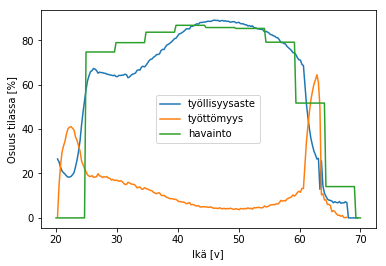

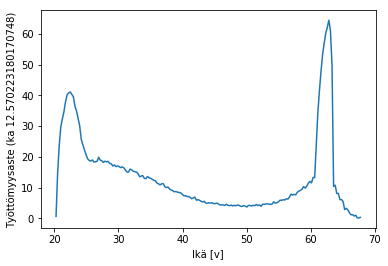

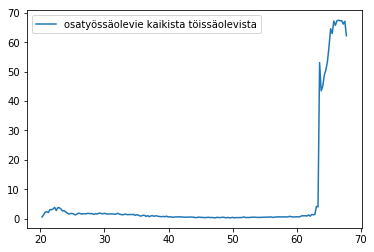

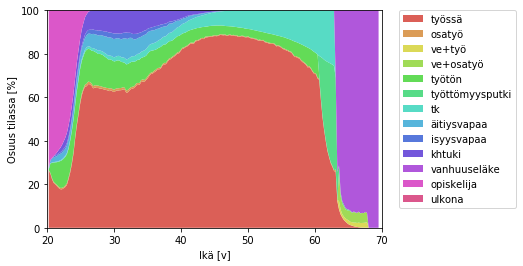

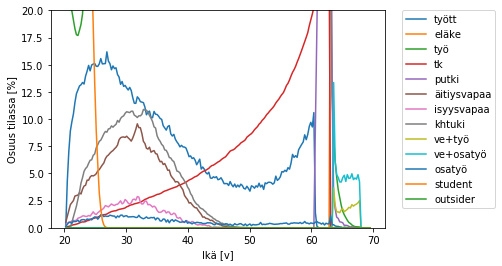

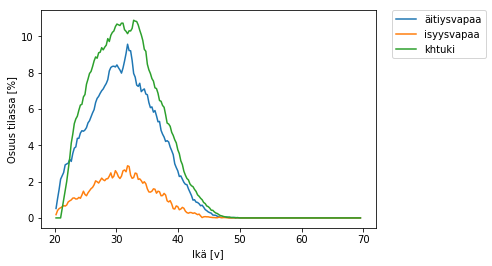

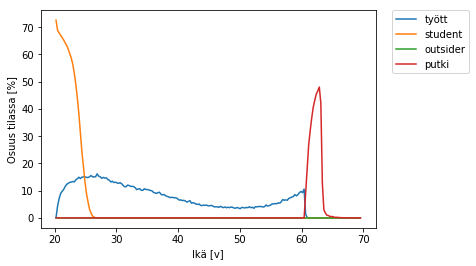

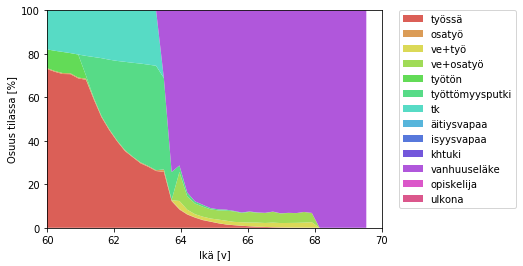

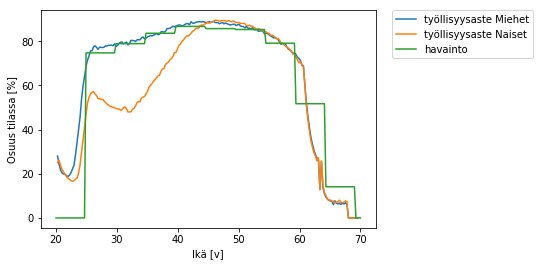

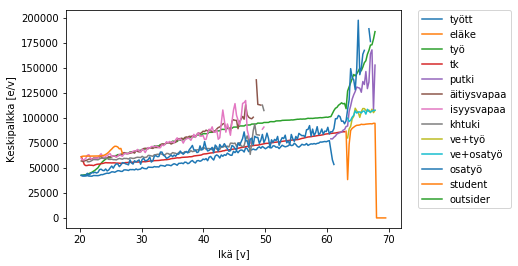

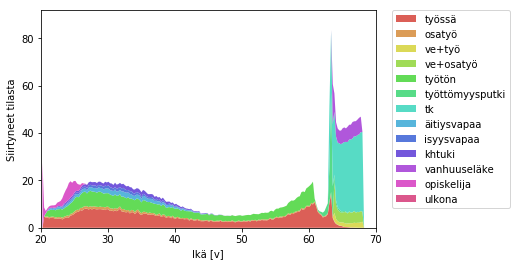

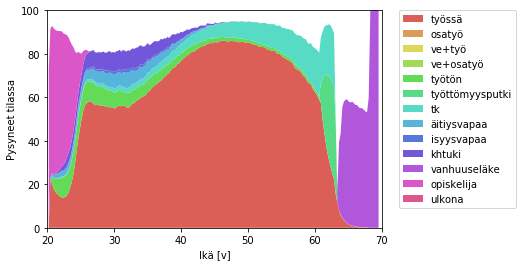

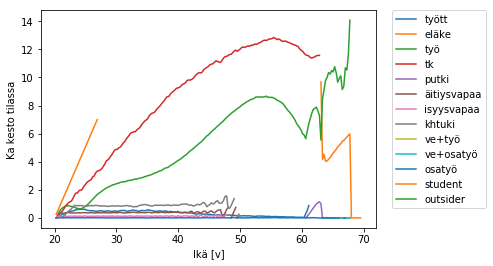

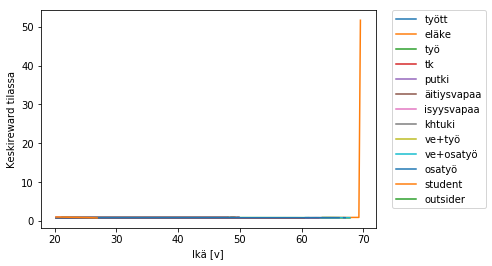

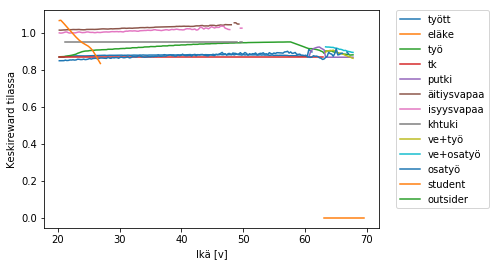

No handles with labels found to put in legend.


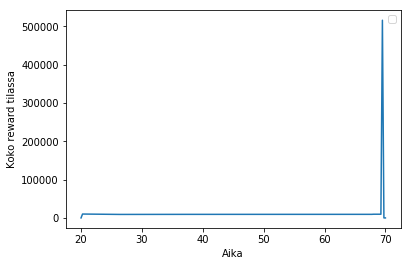

Yhteensä reward 237.7816794851656


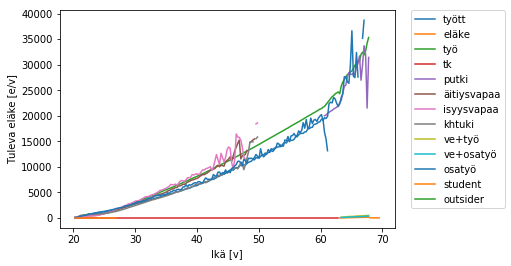

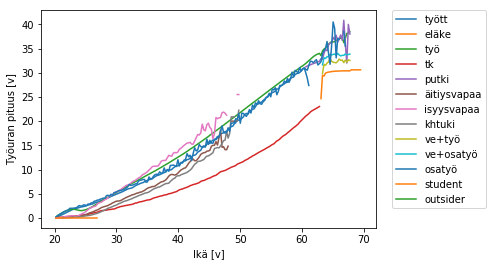

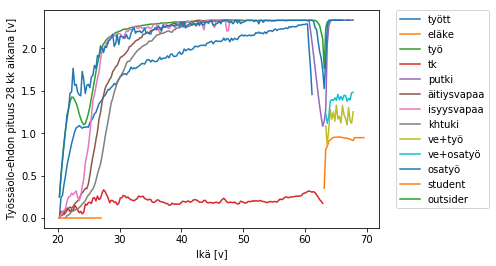

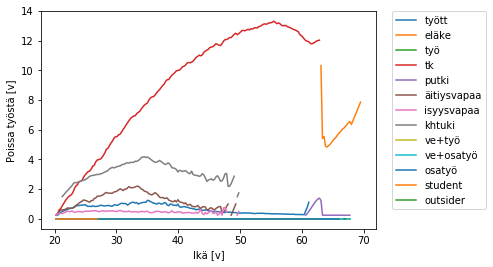

In [11]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_toe.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/best_12kk',plot=True,
                    results='results/12kk_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_toe.render(load='results/12kk_results')


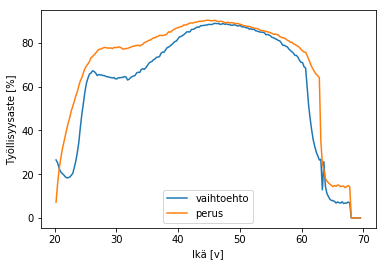

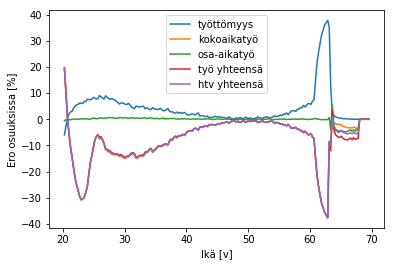

Työllisyysvaikutus 30-63-vuotiaisiin noin -142667.0 htv ja -141163.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -19.147677871175084 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.11209010328766005


In [12]:
cc1_toe.compare_with(cc1)

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.964    |
| fps                | 1242     |
| nupdates           | 1        |
| policy_entropy     | 0.819    |
| policy_loss        | 0.0822   |
| total_timesteps    | 0        |
| value_loss         | 0.483    |
---------------------------------
---------------------------------
| explained_variance | 0.776    |
| fps                | 2157     |
| nupdates           | 10       |
| policy_entropy     | 0.779    |
| policy_loss        | -2.46    |
| total_timesteps    | 22041    |
| value_loss         | 11.7     |
---------------------------------
---------------------------------
| explained_variance | 0.76     |
| fps                | 1898     |
| nupdates           | 20       |
| policy_entropy     | 0.674    |
| policy_loss        | 0.382    |
| total_timesteps    | 46531    |
| value_loss         | 2.76     |
------------------------

---------------------------------
| explained_variance | 0.954    |
| fps                | 1690     |
| nupdates           | 270      |
| policy_entropy     | 0.852    |
| policy_loss        | -0.0937  |
| total_timesteps    | 658781   |
| value_loss         | 0.601    |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps                | 1690     |
| nupdates           | 280      |
| policy_entropy     | 0.884    |
| policy_loss        | -1.09    |
| total_timesteps    | 683271   |
| value_loss         | 2.08     |
---------------------------------
---------------------------------
| explained_variance | 0.886    |
| fps                | 1690     |
| nupdates           | 290      |
| policy_entropy     | 0.871    |
| policy_loss        | 0.534    |
| total_timesteps    | 707761   |
| value_loss         | 1.16     |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 1683     |
| nupdates           | 540      |
| policy_entropy     | 0.869    |
| policy_loss        | 0.696    |
| total_timesteps    | 1320011  |
| value_loss         | 1.24     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1681     |
| nupdates           | 550      |
| policy_entropy     | 0.835    |
| policy_loss        | -0.273   |
| total_timesteps    | 1344501  |
| value_loss         | 0.395    |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps                | 1681     |
| nupdates           | 560      |
| policy_entropy     | 0.854    |
| policy_loss        | -0.63    |
| total_timesteps    | 1368991  |
| value_loss         | 1.33     |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.949    |
| fps                | 1682     |
| nupdates           | 810      |
| policy_entropy     | 0.797    |
| policy_loss        | -0.0296  |
| total_timesteps    | 1981241  |
| value_loss         | 0.552    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1682     |
| nupdates           | 820      |
| policy_entropy     | 0.792    |
| policy_loss        | 0.0904   |
| total_timesteps    | 2005731  |
| value_loss         | 0.483    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1682     |
| nupdates           | 830      |
| policy_entropy     | 0.802    |
| policy_loss        | -0.103   |
| total_timesteps    | 2030221  |
| value_loss         | 0.4      |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.932    |
| fps                | 1684     |
| nupdates           | 1080     |
| policy_entropy     | 0.776    |
| policy_loss        | -0.0924  |
| total_timesteps    | 2642471  |
| value_loss         | 0.621    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 1684     |
| nupdates           | 1090     |
| policy_entropy     | 0.764    |
| policy_loss        | 0.109    |
| total_timesteps    | 2666961  |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 1684     |
| nupdates           | 1100     |
| policy_entropy     | 0.795    |
| policy_loss        | -0.0614  |
| total_timesteps    | 2691451  |
| value_loss         | 0.572    |
---------------------------------
---------------------------------
| explained_variance | 0.939    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 1687     |
| nupdates           | 1350     |
| policy_entropy     | 0.746    |
| policy_loss        | 0.0977   |
| total_timesteps    | 3303701  |
| value_loss         | 0.29     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1687     |
| nupdates           | 1360     |
| policy_entropy     | 0.803    |
| policy_loss        | -0.0235  |
| total_timesteps    | 3328191  |
| value_loss         | 0.469    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 1687     |
| nupdates           | 1370     |
| policy_entropy     | 0.739    |
| policy_loss        | 0.0305   |
| total_timesteps    | 3352681  |
| value_loss         | 0.275    |
---------------------------------
---------------------------------
| explained_variance | 0.896    |
| fps         

---------------------------------
| explained_variance | 0.902    |
| fps                | 1691     |
| nupdates           | 1620     |
| policy_entropy     | 0.856    |
| policy_loss        | -0.154   |
| total_timesteps    | 3964931  |
| value_loss         | 0.693    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1690     |
| nupdates           | 1630     |
| policy_entropy     | 0.727    |
| policy_loss        | 0.0609   |
| total_timesteps    | 3989421  |
| value_loss         | 0.38     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1691     |
| nupdates           | 1640     |
| policy_entropy     | 0.786    |
| policy_loss        | -0.135   |
| total_timesteps    | 4013911  |
| value_loss         | 0.482    |
---------------------------------
---------------------------------
| explained_variance | 0.932    |
| fps         

---------------------------------
| explained_variance | 0.922    |
| fps                | 1692     |
| nupdates           | 1890     |
| policy_entropy     | 0.822    |
| policy_loss        | -0.0977  |
| total_timesteps    | 4626161  |
| value_loss         | 0.53     |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 1692     |
| nupdates           | 1900     |
| policy_entropy     | 0.86     |
| policy_loss        | -0.274   |
| total_timesteps    | 4650651  |
| value_loss         | 0.549    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 1693     |
| nupdates           | 1910     |
| policy_entropy     | 0.754    |
| policy_loss        | 0.106    |
| total_timesteps    | 4675141  |
| value_loss         | 0.233    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 1691     |
| nupdates           | 2160     |
| policy_entropy     | 0.77     |
| policy_loss        | -0.0309  |
| total_timesteps    | 5287391  |
| value_loss         | 0.27     |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 1690     |
| nupdates           | 2170     |
| policy_entropy     | 0.836    |
| policy_loss        | -0.0125  |
| total_timesteps    | 5311881  |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1690     |
| nupdates           | 2180     |
| policy_entropy     | 0.761    |
| policy_loss        | -0.0466  |
| total_timesteps    | 5336371  |
| value_loss         | 0.355    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1675     |
| nupdates           | 2430     |
| policy_entropy     | 0.801    |
| policy_loss        | -0.0855  |
| total_timesteps    | 5948621  |
| value_loss         | 0.287    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1675     |
| nupdates           | 2440     |
| policy_entropy     | 0.811    |
| policy_loss        | 0.0395   |
| total_timesteps    | 5973111  |
| value_loss         | 0.34     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1674     |
| nupdates           | 2450     |
| policy_entropy     | 0.751    |
| policy_loss        | -0.154   |
| total_timesteps    | 5997601  |
| value_loss         | 0.438    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 1678     |
| nupdates           | 2700     |
| policy_entropy     | 0.767    |
| policy_loss        | -0.0213  |
| total_timesteps    | 6609851  |
| value_loss         | 0.265    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 1678     |
| nupdates           | 2710     |
| policy_entropy     | 0.791    |
| policy_loss        | -0.109   |
| total_timesteps    | 6634341  |
| value_loss         | 0.436    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 1678     |
| nupdates           | 2720     |
| policy_entropy     | 0.759    |
| policy_loss        | 0.0109   |
| total_timesteps    | 6658831  |
| value_loss         | 0.334    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 1682     |
| nupdates           | 2970     |
| policy_entropy     | 0.828    |
| policy_loss        | 0.105    |
| total_timesteps    | 7271081  |
| value_loss         | 0.317    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1682     |
| nupdates           | 2980     |
| policy_entropy     | 0.858    |
| policy_loss        | -0.167   |
| total_timesteps    | 7295571  |
| value_loss         | 0.339    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1682     |
| nupdates           | 2990     |
| policy_entropy     | 0.798    |
| policy_loss        | 0.0669   |
| total_timesteps    | 7320061  |
| value_loss         | 0.355    |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 1685     |
| nupdates           | 3240     |
| policy_entropy     | 0.799    |
| policy_loss        | 0.082    |
| total_timesteps    | 7932311  |
| value_loss         | 0.181    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1685     |
| nupdates           | 3250     |
| policy_entropy     | 0.851    |
| policy_loss        | 0.0153   |
| total_timesteps    | 7956801  |
| value_loss         | 0.258    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1685     |
| nupdates           | 3260     |
| policy_entropy     | 0.799    |
| policy_loss        | 0.0613   |
| total_timesteps    | 7981291  |
| value_loss         | 0.294    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 1687     |
| nupdates           | 3510     |
| policy_entropy     | 0.795    |
| policy_loss        | 0.0147   |
| total_timesteps    | 8593541  |
| value_loss         | 0.549    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1687     |
| nupdates           | 3520     |
| policy_entropy     | 0.792    |
| policy_loss        | 0.0137   |
| total_timesteps    | 8618031  |
| value_loss         | 0.404    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1687     |
| nupdates           | 3530     |
| policy_entropy     | 0.746    |
| policy_loss        | -0.0108  |
| total_timesteps    | 8642521  |
| value_loss         | 0.289    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 1688     |
| nupdates           | 3780     |
| policy_entropy     | 0.786    |
| policy_loss        | 0.0309   |
| total_timesteps    | 9254771  |
| value_loss         | 0.376    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1688     |
| nupdates           | 3790     |
| policy_entropy     | 0.751    |
| policy_loss        | 0.0256   |
| total_timesteps    | 9279261  |
| value_loss         | 0.33     |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 1688     |
| nupdates           | 3800     |
| policy_entropy     | 0.805    |
| policy_loss        | 0.0366   |
| total_timesteps    | 9303751  |
| value_loss         | 0.551    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 1687     |
| nupdates           | 4050     |
| policy_entropy     | 0.733    |
| policy_loss        | 0.0623   |
| total_timesteps    | 9916001  |
| value_loss         | 0.318    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1687     |
| nupdates           | 4060     |
| policy_entropy     | 0.809    |
| policy_loss        | 0.0242   |
| total_timesteps    | 9940491  |
| value_loss         | 0.344    |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 1687     |
| nupdates           | 4070     |
| policy_entropy     | 0.823    |
| policy_loss        | 0.0332   |
| total_timesteps    | 9964981  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

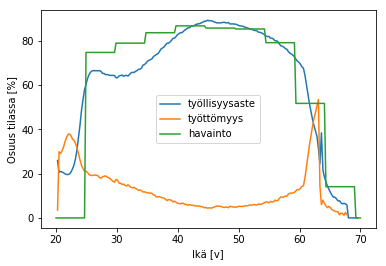

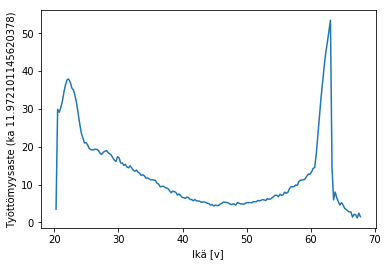

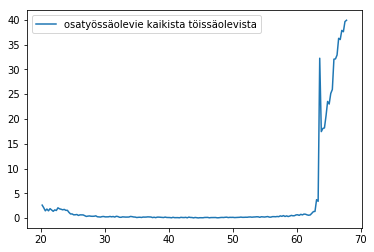

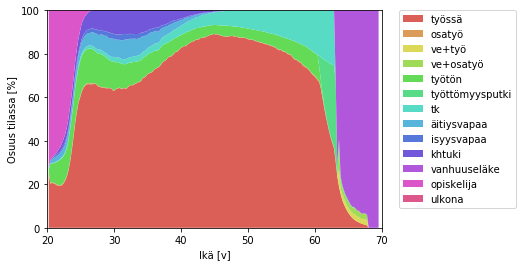

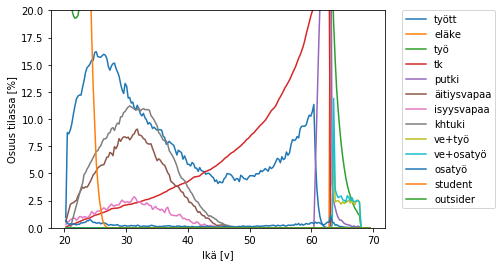

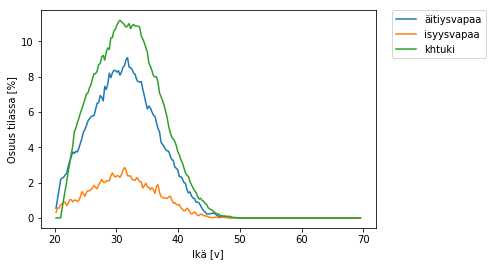

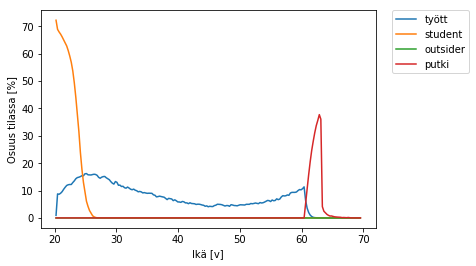

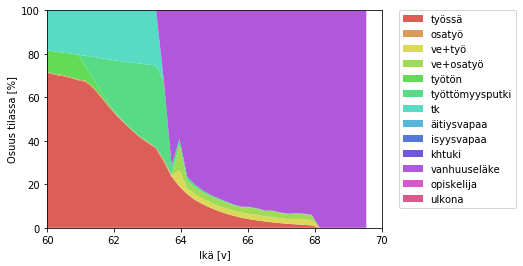

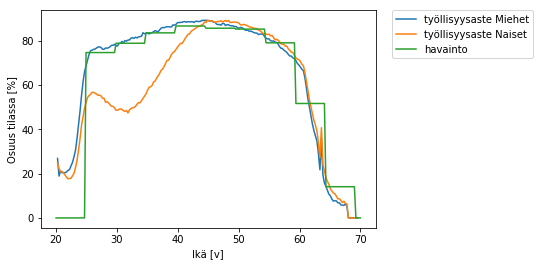

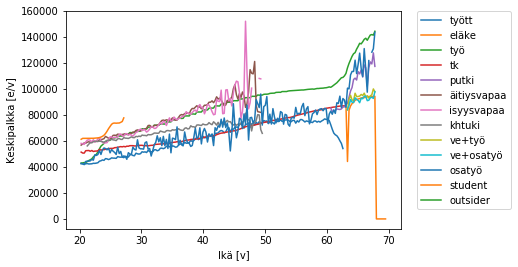

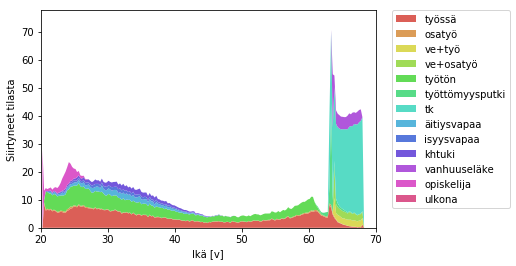

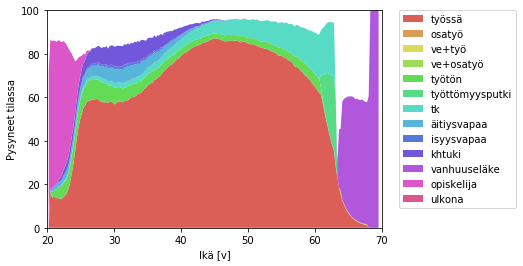

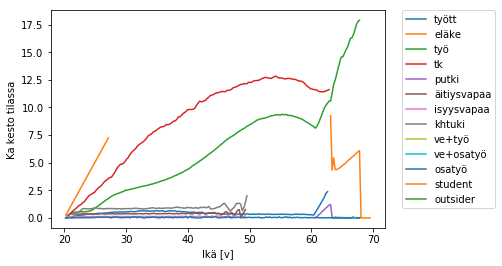

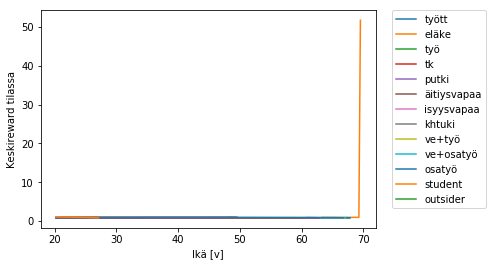

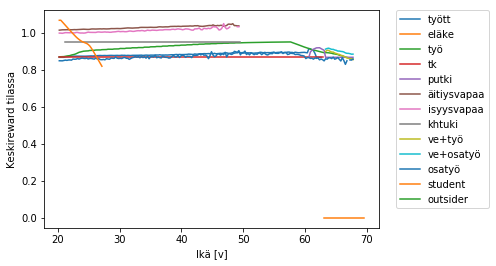

No handles with labels found to put in legend.


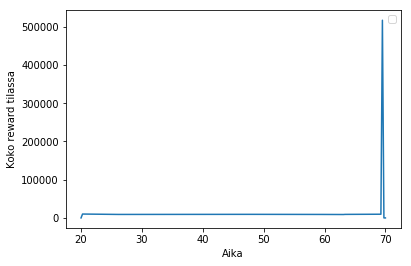

Yhteensä reward 237.88543427587078


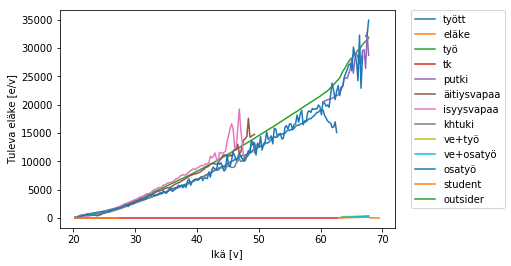

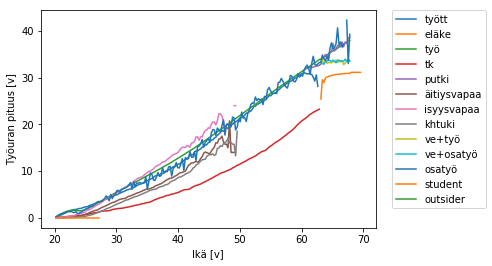

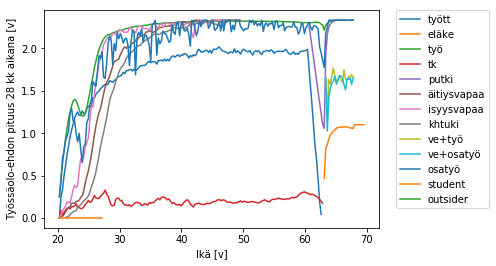

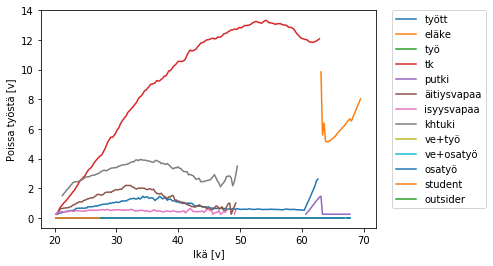

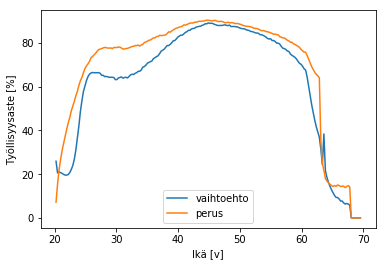

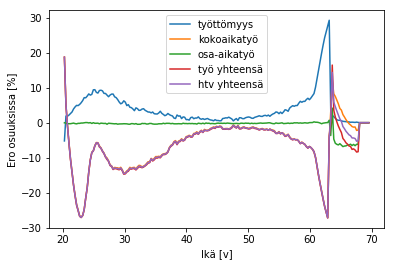

Työllisyysvaikutus 30-63-vuotiaisiin noin -133894.0 htv ja -136252.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -18.481538401021112 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.09670492189847198


In [13]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,
                  mortality=mortality,perustulo=False,randomness=randomness)
cc1_350.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_50pv',plot=True,
                    results='results/50pv_results',start_from=perusmalli,cont=True,
                    callback_minsteps=callback_minsteps,twostage=twostage)
cc1_350.render(load='results/50pv_results')
cc1_350.compare_with(cc1)

# Perustulo

Alustava versio. Tulee muuttumaan, kun mukana koko mallli.

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.974    |
| fps                | 1451     |
| nupdates           | 1        |
| policy_entropy     | 0.804    |
| policy_loss        | 0.0788   |
| total_timesteps    | 0        |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 0.922    |
| fps                | 2423     |
| nupdates           | 10       |
| policy_entropy     | 0.852    |
| policy_loss        | -1.77    |
| total_timesteps    | 22041    |
| value_loss         | 5.25     |
---------------------------------
---------------------------------
| explained_variance | 0.9      |
| fps                | 2116     |
| nupdates           | 20       |
| policy_entropy     | 0.793    |
| policy_loss        | 2.4      |
| total_timesteps    | 46531    |
| value_loss         | 10.3     |
------------------------

---------------------------------
| explained_variance | 0.935    |
| fps                | 1563     |
| nupdates           | 270      |
| policy_entropy     | 0.846    |
| policy_loss        | 0.418    |
| total_timesteps    | 658781   |
| value_loss         | 1.04     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1563     |
| nupdates           | 280      |
| policy_entropy     | 0.871    |
| policy_loss        | -1.02    |
| total_timesteps    | 683271   |
| value_loss         | 1.8      |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1563     |
| nupdates           | 290      |
| policy_entropy     | 0.908    |
| policy_loss        | 0.555    |
| total_timesteps    | 707761   |
| value_loss         | 0.644    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps         

---------------------------------
| explained_variance | 0.951    |
| fps                | 1585     |
| nupdates           | 540      |
| policy_entropy     | 0.832    |
| policy_loss        | -0.397   |
| total_timesteps    | 1320011  |
| value_loss         | 0.766    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1586     |
| nupdates           | 550      |
| policy_entropy     | 0.822    |
| policy_loss        | 0.482    |
| total_timesteps    | 1344501  |
| value_loss         | 0.707    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1588     |
| nupdates           | 560      |
| policy_entropy     | 0.842    |
| policy_loss        | -0.198   |
| total_timesteps    | 1368991  |
| value_loss         | 0.444    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.926    |
| fps                | 1620     |
| nupdates           | 810      |
| policy_entropy     | 0.828    |
| policy_loss        | -0.364   |
| total_timesteps    | 1981241  |
| value_loss         | 1.04     |
---------------------------------
---------------------------------
| explained_variance | 0.926    |
| fps                | 1621     |
| nupdates           | 820      |
| policy_entropy     | 0.823    |
| policy_loss        | 0.0202   |
| total_timesteps    | 2005731  |
| value_loss         | 0.604    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1622     |
| nupdates           | 830      |
| policy_entropy     | 0.817    |
| policy_loss        | -0.104   |
| total_timesteps    | 2030221  |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 1639     |
| nupdates           | 1080     |
| policy_entropy     | 0.841    |
| policy_loss        | -0.00148 |
| total_timesteps    | 2642471  |
| value_loss         | 0.42     |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1639     |
| nupdates           | 1090     |
| policy_entropy     | 0.846    |
| policy_loss        | -0.0805  |
| total_timesteps    | 2666961  |
| value_loss         | 0.6      |
---------------------------------
---------------------------------
| explained_variance | 0.916    |
| fps                | 1639     |
| nupdates           | 1100     |
| policy_entropy     | 0.81     |
| policy_loss        | 0.0314   |
| total_timesteps    | 2691451  |
| value_loss         | 0.394    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 1649     |
| nupdates           | 1350     |
| policy_entropy     | 0.812    |
| policy_loss        | 0.12     |
| total_timesteps    | 3303701  |
| value_loss         | 0.195    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1650     |
| nupdates           | 1360     |
| policy_entropy     | 0.769    |
| policy_loss        | -0.152   |
| total_timesteps    | 3328191  |
| value_loss         | 0.8      |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 1651     |
| nupdates           | 1370     |
| policy_entropy     | 0.832    |
| policy_loss        | -0.0897  |
| total_timesteps    | 3352681  |
| value_loss         | 0.475    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.942    |
| fps                | 1660     |
| nupdates           | 1620     |
| policy_entropy     | 0.795    |
| policy_loss        | -0.0273  |
| total_timesteps    | 3964931  |
| value_loss         | 0.533    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 1660     |
| nupdates           | 1630     |
| policy_entropy     | 0.823    |
| policy_loss        | 0.0321   |
| total_timesteps    | 3989421  |
| value_loss         | 0.49     |
---------------------------------
---------------------------------
| explained_variance | 0.926    |
| fps                | 1660     |
| nupdates           | 1640     |
| policy_entropy     | 0.819    |
| policy_loss        | -0.12    |
| total_timesteps    | 4013911  |
| value_loss         | 0.355    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1667     |
| nupdates           | 1890     |
| policy_entropy     | 0.808    |
| policy_loss        | 0.0233   |
| total_timesteps    | 4626161  |
| value_loss         | 0.401    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 1667     |
| nupdates           | 1900     |
| policy_entropy     | 0.791    |
| policy_loss        | -0.0304  |
| total_timesteps    | 4650651  |
| value_loss         | 0.379    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1668     |
| nupdates           | 1910     |
| policy_entropy     | 0.813    |
| policy_loss        | 0.0335   |
| total_timesteps    | 4675141  |
| value_loss         | 0.302    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 1672     |
| nupdates           | 2160     |
| policy_entropy     | 0.792    |
| policy_loss        | -0.236   |
| total_timesteps    | 5287391  |
| value_loss         | 0.528    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1672     |
| nupdates           | 2170     |
| policy_entropy     | 0.772    |
| policy_loss        | 0.0907   |
| total_timesteps    | 5311881  |
| value_loss         | 0.295    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1672     |
| nupdates           | 2180     |
| policy_entropy     | 0.745    |
| policy_loss        | -0.0709  |
| total_timesteps    | 5336371  |
| value_loss         | 0.276    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 1677     |
| nupdates           | 2430     |
| policy_entropy     | 0.787    |
| policy_loss        | 0.0165   |
| total_timesteps    | 5948621  |
| value_loss         | 0.332    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 1677     |
| nupdates           | 2440     |
| policy_entropy     | 0.765    |
| policy_loss        | -0.0548  |
| total_timesteps    | 5973111  |
| value_loss         | 0.353    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 1677     |
| nupdates           | 2450     |
| policy_entropy     | 0.865    |
| policy_loss        | 0.0601   |
| total_timesteps    | 5997601  |
| value_loss         | 0.306    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 1677     |
| nupdates           | 2700     |
| policy_entropy     | 0.811    |
| policy_loss        | -0.00249 |
| total_timesteps    | 6609851  |
| value_loss         | 0.36     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1677     |
| nupdates           | 2710     |
| policy_entropy     | 0.805    |
| policy_loss        | -0.135   |
| total_timesteps    | 6634341  |
| value_loss         | 0.471    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1677     |
| nupdates           | 2720     |
| policy_entropy     | 0.802    |
| policy_loss        | 0.0914   |
| total_timesteps    | 6658831  |
| value_loss         | 0.271    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.93     |
| fps                | 1667     |
| nupdates           | 2970     |
| policy_entropy     | 0.801    |
| policy_loss        | -0.0173  |
| total_timesteps    | 7271081  |
| value_loss         | 0.635    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1667     |
| nupdates           | 2980     |
| policy_entropy     | 0.77     |
| policy_loss        | 0.0416   |
| total_timesteps    | 7295571  |
| value_loss         | 0.386    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1666     |
| nupdates           | 2990     |
| policy_entropy     | 0.8      |
| policy_loss        | 0.0147   |
| total_timesteps    | 7320061  |
| value_loss         | 0.38     |
---------------------------------
----------------------------------
| explained_variance | 0.979     |
| fps       

---------------------------------
| explained_variance | 0.957    |
| fps                | 1669     |
| nupdates           | 3240     |
| policy_entropy     | 0.79     |
| policy_loss        | 0.76     |
| total_timesteps    | 7932311  |
| value_loss         | 1.4      |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 1669     |
| nupdates           | 3250     |
| policy_entropy     | 0.833    |
| policy_loss        | -0.625   |
| total_timesteps    | 7956801  |
| value_loss         | 1.03     |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps                | 1669     |
| nupdates           | 3260     |
| policy_entropy     | 0.737    |
| policy_loss        | -0.35    |
| total_timesteps    | 7981291  |
| value_loss         | 1.02     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.945    |
| fps                | 1672     |
| nupdates           | 3510     |
| policy_entropy     | 0.897    |
| policy_loss        | -0.365   |
| total_timesteps    | 8593541  |
| value_loss         | 0.699    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1672     |
| nupdates           | 3520     |
| policy_entropy     | 0.82     |
| policy_loss        | -0.193   |
| total_timesteps    | 8618031  |
| value_loss         | 0.402    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1673     |
| nupdates           | 3530     |
| policy_entropy     | 0.932    |
| policy_loss        | 0.132    |
| total_timesteps    | 8642521  |
| value_loss         | 0.438    |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 1673     |
| nupdates           | 3780     |
| policy_entropy     | 0.818    |
| policy_loss        | 0.00308  |
| total_timesteps    | 9254771  |
| value_loss         | 0.272    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 1674     |
| nupdates           | 3790     |
| policy_entropy     | 0.757    |
| policy_loss        | -0.0105  |
| total_timesteps    | 9279261  |
| value_loss         | 0.667    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1674     |
| nupdates           | 3800     |
| policy_entropy     | 0.827    |
| policy_loss        | -0.00923 |
| total_timesteps    | 9303751  |
| value_loss         | 0.253    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 1675     |
| nupdates           | 4050     |
| policy_entropy     | 0.796    |
| policy_loss        | -0.0493  |
| total_timesteps    | 9916001  |
| value_loss         | 0.39     |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 1675     |
| nupdates           | 4060     |
| policy_entropy     | 0.787    |
| policy_loss        | -0.137   |
| total_timesteps    | 9940491  |
| value_loss         | 0.596    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1675     |
| nupdates           | 4070     |
| policy_entropy     | 0.843    |
| policy_loss        | 0.002    |
| total_timesteps    | 9964981  |
| value_loss         | 0.383    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

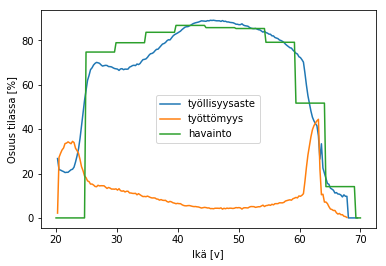

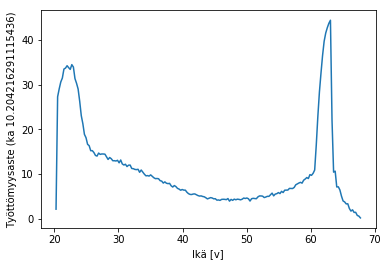

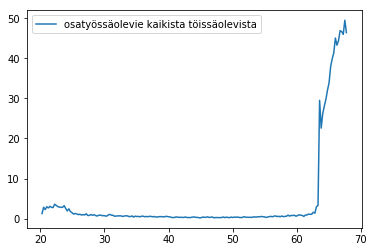

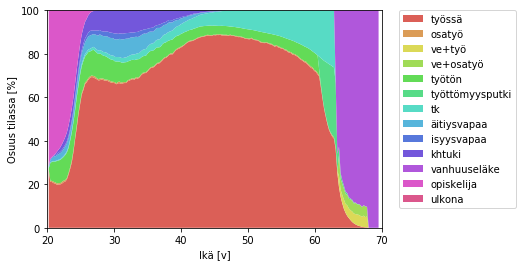

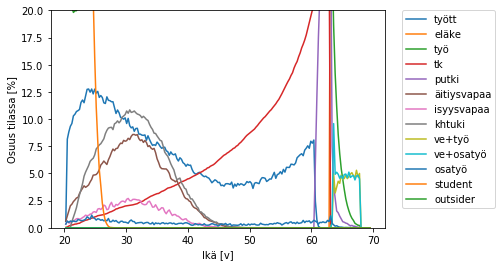

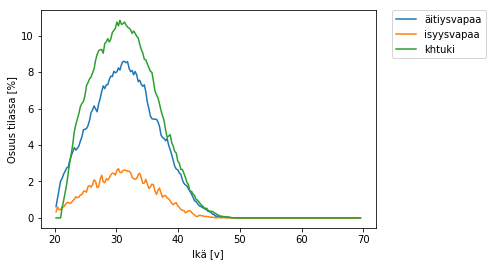

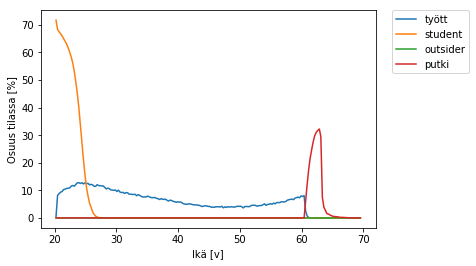

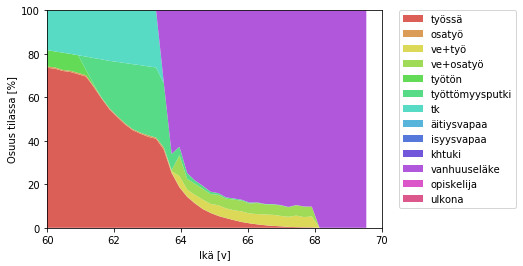

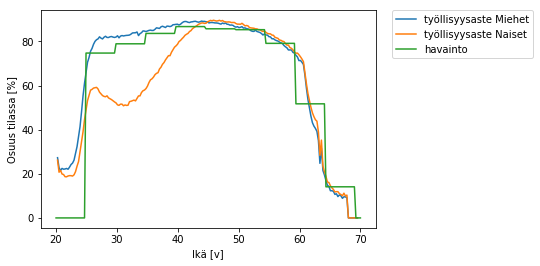

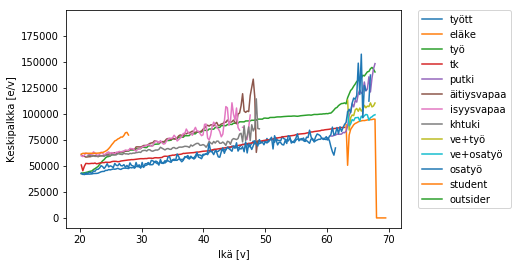

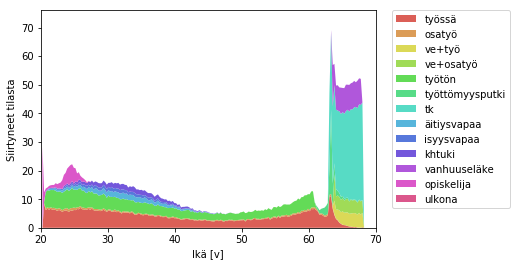

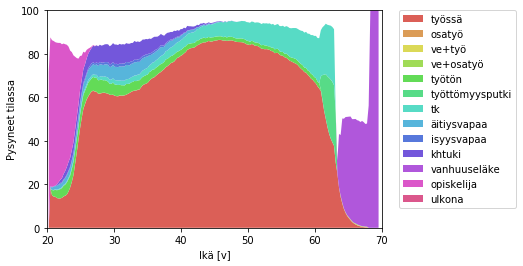

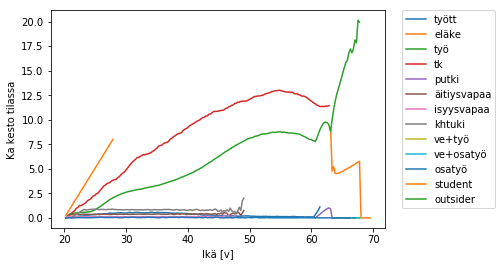

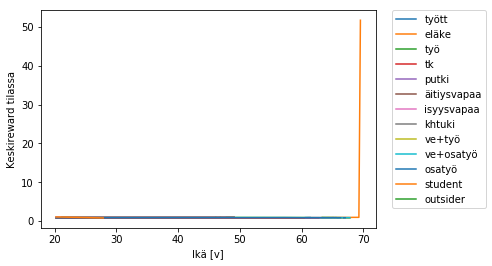

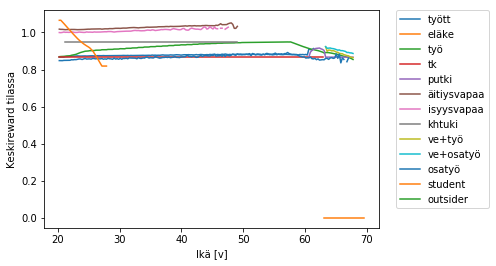

No handles with labels found to put in legend.


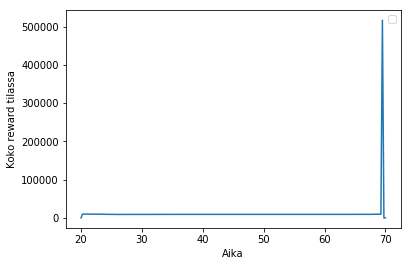

Yhteensä reward 237.68061520690034


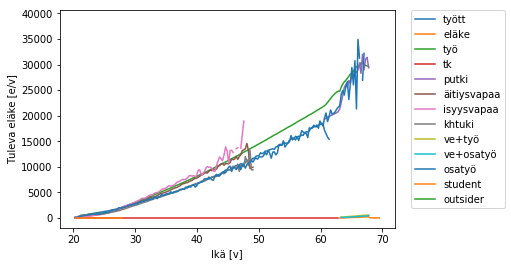

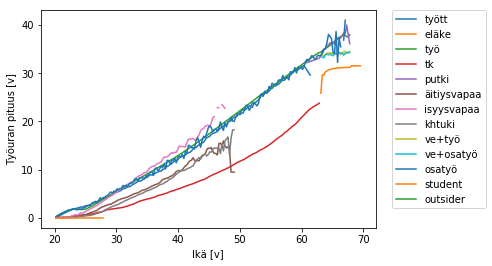

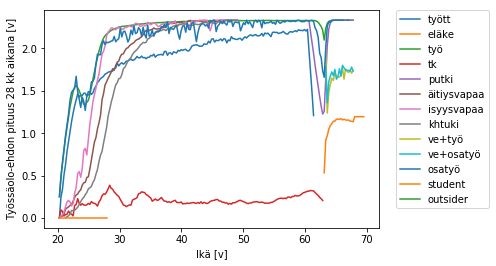

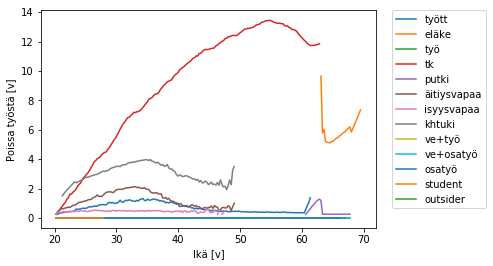

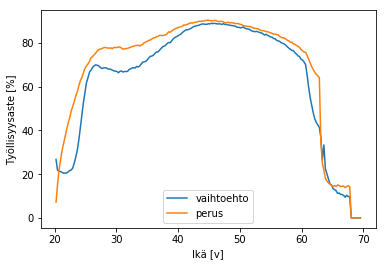

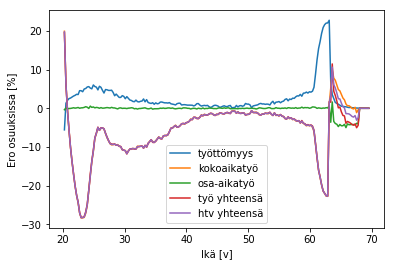

Työllisyysvaikutus 30-63-vuotiaisiin noin -107070.0 htv ja -106976.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -14.510473622314812 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.0910393953402053


In [14]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_pt',plot=True,
                   results='results/perustulo_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_pt.render(load='results/perustulo_results')
cc1_pt.compare_with(cc1)

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [15]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_400.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_300pv',plot=True,
                    results='results/300pv_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_400.render(load='results/300pv_results')
cc1_400.compare_with(cc1)

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.965    |
| fps                | 1270     |
| nupdates           | 1        |
| policy_entropy     | 0.872    |
| policy_loss        | -0.133   |
| total_timesteps    | 0        |
| value_loss         | 0.447    |
---------------------------------
---------------------------------
| explained_variance | 0.858    |
| fps                | 2164     |
| nupdates           | 10       |
| policy_entropy     | 0.818    |
| policy_loss        | 1.92     |
| total_timesteps    | 22041    |
| value_loss         | 5.94     |
---------------------------------
---------------------------------
| explained_variance | 0.874    |
| fps                | 1900     |
| nupdates           | 20       |
| policy_entropy     | 0.859    |
| policy_loss        | -2.51    |
| total_timesteps    | 46531    |
| value_loss         | 10.1     |
------------------------

---------------------------------
| explained_variance | 0.948    |
| fps                | 1679     |
| nupdates           | 270      |
| policy_entropy     | 0.949    |
| policy_loss        | 1.23     |
| total_timesteps    | 658781   |
| value_loss         | 2.28     |
---------------------------------
---------------------------------
| explained_variance | 0.916    |
| fps                | 1679     |
| nupdates           | 280      |
| policy_entropy     | 0.952    |
| policy_loss        | 0.728    |
| total_timesteps    | 683271   |
| value_loss         | 1.51     |
---------------------------------
---------------------------------
| explained_variance | 0.854    |
| fps                | 1678     |
| nupdates           | 290      |
| policy_entropy     | 0.918    |
| policy_loss        | -1.5     |
| total_timesteps    | 707761   |
| value_loss         | 4.11     |
---------------------------------
---------------------------------
| explained_variance | 0.918    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 1684     |
| nupdates           | 540      |
| policy_entropy     | 0.887    |
| policy_loss        | -0.736   |
| total_timesteps    | 1320011  |
| value_loss         | 1.06     |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1687     |
| nupdates           | 550      |
| policy_entropy     | 0.856    |
| policy_loss        | 0.23     |
| total_timesteps    | 1344501  |
| value_loss         | 0.327    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1691     |
| nupdates           | 560      |
| policy_entropy     | 0.883    |
| policy_loss        | 0.381    |
| total_timesteps    | 1368991  |
| value_loss         | 0.628    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.958    |
| fps                | 1637     |
| nupdates           | 810      |
| policy_entropy     | 0.844    |
| policy_loss        | -0.0336  |
| total_timesteps    | 1981241  |
| value_loss         | 0.376    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 1636     |
| nupdates           | 820      |
| policy_entropy     | 0.879    |
| policy_loss        | -0.135   |
| total_timesteps    | 2005731  |
| value_loss         | 0.501    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1635     |
| nupdates           | 830      |
| policy_entropy     | 0.826    |
| policy_loss        | -0.0939  |
| total_timesteps    | 2030221  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.954    |
| fps                | 1630     |
| nupdates           | 1080     |
| policy_entropy     | 0.83     |
| policy_loss        | 0.0797   |
| total_timesteps    | 2642471  |
| value_loss         | 0.277    |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps                | 1630     |
| nupdates           | 1090     |
| policy_entropy     | 0.876    |
| policy_loss        | -0.16    |
| total_timesteps    | 2666961  |
| value_loss         | 0.445    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 1631     |
| nupdates           | 1100     |
| policy_entropy     | 0.773    |
| policy_loss        | 0.074    |
| total_timesteps    | 2691451  |
| value_loss         | 0.198    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 1644     |
| nupdates           | 1350     |
| policy_entropy     | 0.855    |
| policy_loss        | -0.332   |
| total_timesteps    | 3303701  |
| value_loss         | 0.653    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1644     |
| nupdates           | 1360     |
| policy_entropy     | 0.805    |
| policy_loss        | 0.178    |
| total_timesteps    | 3328191  |
| value_loss         | 0.623    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1644     |
| nupdates           | 1370     |
| policy_entropy     | 0.793    |
| policy_loss        | -0.0288  |
| total_timesteps    | 3352681  |
| value_loss         | 0.397    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1652     |
| nupdates           | 1620     |
| policy_entropy     | 0.779    |
| policy_loss        | -0.14    |
| total_timesteps    | 3964931  |
| value_loss         | 0.413    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 1653     |
| nupdates           | 1630     |
| policy_entropy     | 0.807    |
| policy_loss        | 0.69     |
| total_timesteps    | 3989421  |
| value_loss         | 1.55     |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 1653     |
| nupdates           | 1640     |
| policy_entropy     | 0.775    |
| policy_loss        | -0.295   |
| total_timesteps    | 4013911  |
| value_loss         | 0.453    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.953    |
| fps                | 1660     |
| nupdates           | 1890     |
| policy_entropy     | 0.758    |
| policy_loss        | -0.0167  |
| total_timesteps    | 4626161  |
| value_loss         | 0.616    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1660     |
| nupdates           | 1900     |
| policy_entropy     | 0.789    |
| policy_loss        | 0.00677  |
| total_timesteps    | 4650651  |
| value_loss         | 0.28     |
---------------------------------
---------------------------------
| explained_variance | 0.932    |
| fps                | 1661     |
| nupdates           | 1910     |
| policy_entropy     | 0.756    |
| policy_loss        | -0.104   |
| total_timesteps    | 4675141  |
| value_loss         | 0.584    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 1667     |
| nupdates           | 2160     |
| policy_entropy     | 0.791    |
| policy_loss        | -0.0495  |
| total_timesteps    | 5287391  |
| value_loss         | 0.316    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1667     |
| nupdates           | 2170     |
| policy_entropy     | 0.712    |
| policy_loss        | -0.0167  |
| total_timesteps    | 5311881  |
| value_loss         | 0.374    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1668     |
| nupdates           | 2180     |
| policy_entropy     | 0.769    |
| policy_loss        | -0.109   |
| total_timesteps    | 5336371  |
| value_loss         | 0.341    |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 1672     |
| nupdates           | 2430     |
| policy_entropy     | 0.803    |
| policy_loss        | -0.0104  |
| total_timesteps    | 5948621  |
| value_loss         | 0.31     |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 1673     |
| nupdates           | 2440     |
| policy_entropy     | 0.744    |
| policy_loss        | 0.0845   |
| total_timesteps    | 5973111  |
| value_loss         | 0.181    |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps                | 1673     |
| nupdates           | 2450     |
| policy_entropy     | 0.809    |
| policy_loss        | -0.275   |
| total_timesteps    | 5997601  |
| value_loss         | 0.952    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.936    |
| fps                | 1677     |
| nupdates           | 2700     |
| policy_entropy     | 0.842    |
| policy_loss        | -0.247   |
| total_timesteps    | 6609851  |
| value_loss         | 0.713    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1677     |
| nupdates           | 2710     |
| policy_entropy     | 0.767    |
| policy_loss        | -0.0375  |
| total_timesteps    | 6634341  |
| value_loss         | 0.463    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1677     |
| nupdates           | 2720     |
| policy_entropy     | 0.801    |
| policy_loss        | -0.0287  |
| total_timesteps    | 6658831  |
| value_loss         | 0.354    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.958    |
| fps                | 1680     |
| nupdates           | 2970     |
| policy_entropy     | 0.763    |
| policy_loss        | 0.06     |
| total_timesteps    | 7271081  |
| value_loss         | 0.422    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1680     |
| nupdates           | 2980     |
| policy_entropy     | 0.716    |
| policy_loss        | -0.102   |
| total_timesteps    | 7295571  |
| value_loss         | 0.358    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 1680     |
| nupdates           | 2990     |
| policy_entropy     | 0.771    |
| policy_loss        | -0.0109  |
| total_timesteps    | 7320061  |
| value_loss         | 0.267    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

KeyboardInterrupt: 